### Connecttel Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns   

In [2]:
# Importing the data file

df = pd.read_csv ("Customer-Churn.csv")


### Accessing the Dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


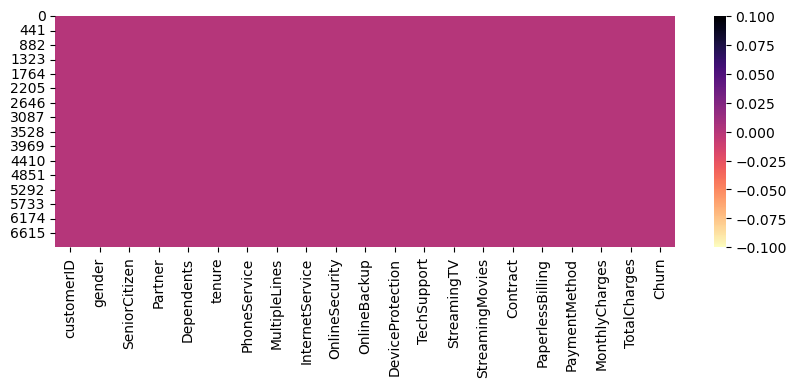

In [7]:
# checking for missing data
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar= True , cmap="magma_r");

In [8]:
df.duplicated().any()

False

In [9]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [11]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [14]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [16]:
def ml(MultipleLines):
    if MultipleLines == "Yes":
        return "Yes"
    else:
        return "No"
df['MultipleLines']=df['MultipleLines'].apply(ml)

In [17]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [18]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
def os(OnlineSecurity):
    if OnlineSecurity == "Yes":
        return "Yes"
    else:
        return "No"
df['OnlineSecurity']=df['OnlineSecurity'].apply(os)

In [20]:
df["OnlineSecurity"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
def ob(OnlineBackup):
    if OnlineBackup == "Yes":
        return "Yes"
    else:
        return "No"
df['OnlineBackup']=df['OnlineBackup'].apply(ob)

In [23]:
df["OnlineBackup"].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
def dp(DeviceProtection):
    if DeviceProtection == "Yes":
        return "Yes"
    else:
        return "No"
df['DeviceProtection']=df['DeviceProtection'].apply(dp)

In [26]:
df["DeviceProtection"].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
def ts(TechSupport):
    if TechSupport == "Yes":
        return "Yes"
    else:
        return "No"
df['TechSupport']=df['TechSupport'].apply(ts)

In [29]:
df["TechSupport"].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
def st(StreamingTV):
    if StreamingTV == "Yes":
        return "Yes"
    else:
        return "No"
df['StreamingTV']=df['StreamingTV'].apply(st)

In [32]:
df["StreamingTV"].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
def sm(StreamingMovies):
    if StreamingMovies == "Yes":
        return "Yes"
    else:
        return "No"
df['StreamingMovies']=df['StreamingMovies'].apply(sm)

In [35]:
df["StreamingMovies"].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [37]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [39]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [40]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [41]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [42]:
df['TotalCharges'] = df['TotalCharges'].str.replace('[^\d.]', '', regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [43]:
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [44]:
df['TotalCharges'].isna().sum() 

11

In [45]:
df['TotalCharges'].mean()

2283.3004408418656

In [46]:
#df.dropna(inplace=True)

In [47]:
df['TotalCharges']= df['TotalCharges'].fillna(value=df['TotalCharges'].mean())

In [48]:
df['TotalCharges'].isna().sum() 

0

In [49]:
# Categorical statistical Analysis

df.describe(include = ["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


In [50]:
# Numerical Statistical Analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_15168\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


## Exploratory Data Analysis

###  Univariate Analysis

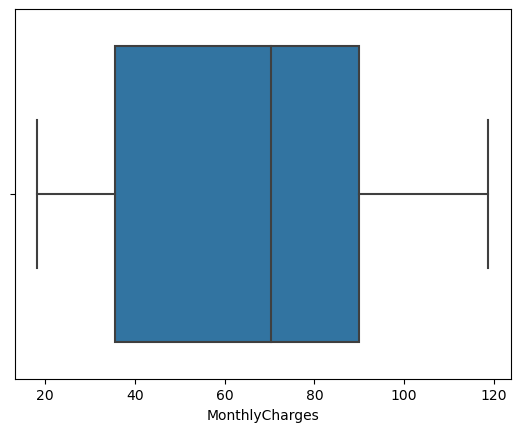

In [52]:
# Numerical 
sns.boxplot(x= df['MonthlyCharges']);

Minimum monthly charge is 20, average is around 70 while the maximum is about 120

In [53]:
df['MonthlyCharges'].sum() 

456116.6

In [54]:
df['TotalCharges'].sum() 

16081285.00484926

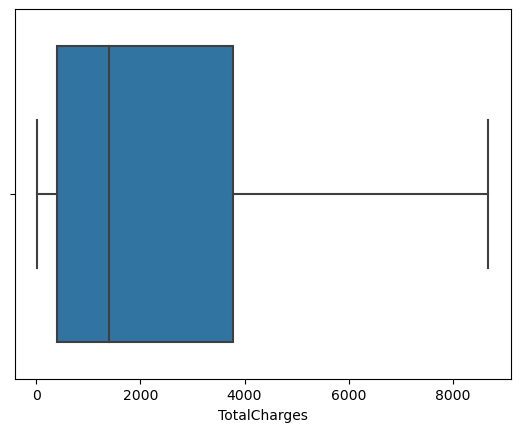

In [55]:
sns.boxplot(x= df['TotalCharges']);

Minimum Total charge of a customers 20 while the maximum is 9000

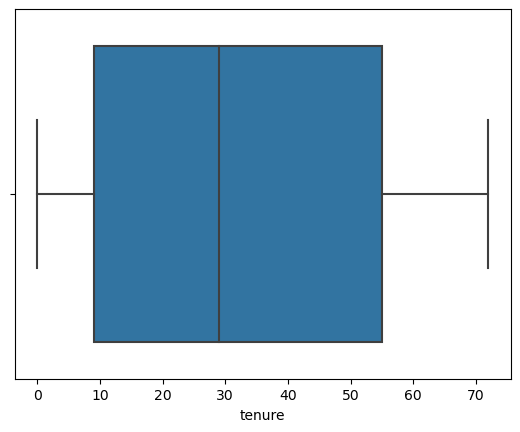

In [56]:
sns.boxplot(x= df['tenure']);

The highest duration duration of customer relationship is 70 months, mean of tenure duration is 29 there about and the least of tenure is 0

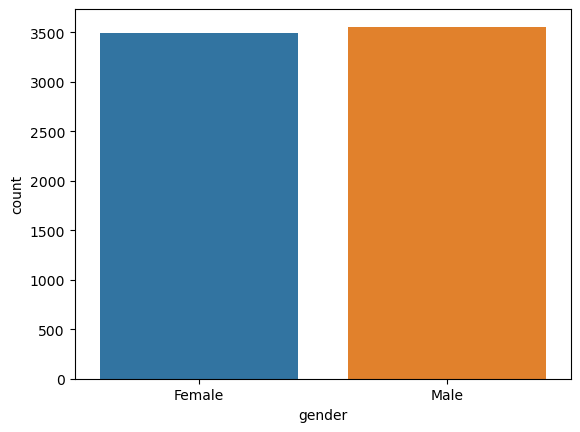

In [57]:
# categorical univariate analysis

# How many Customers belong to a specific gender

sns.countplot(x="gender", data =df);

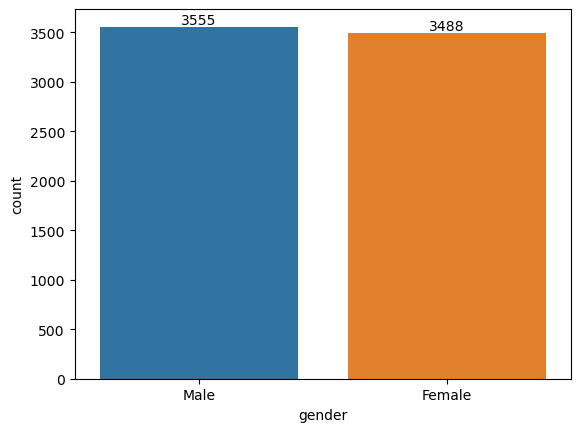

In [58]:
ax= sns.countplot(x=df["gender"], order=df["gender"].value_counts(ascending=False).index)
values= df["gender"].value_counts(ascending= False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [59]:
from collections import Counter

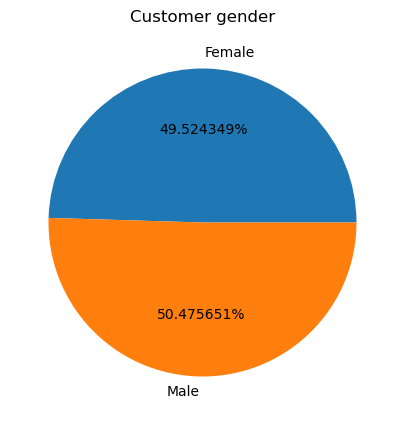

In [60]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer gender")
plt.show();

####  Narration
 - There is no much disparity between the number of female and male gender 49.5% and 50.5% respectively

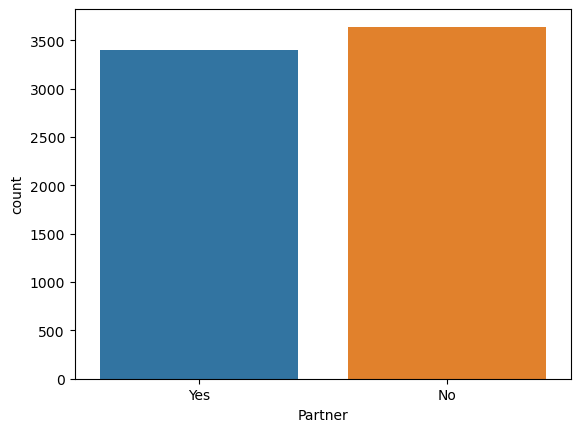

In [61]:
sns.countplot(x="Partner", data =df);

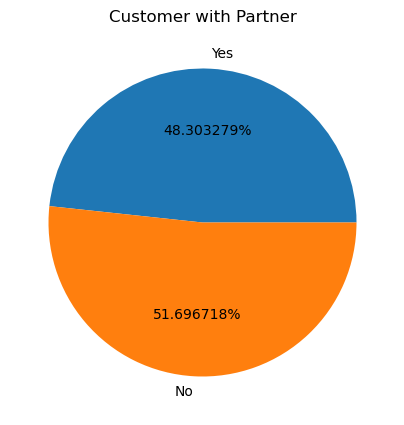

In [62]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Partner"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer with Partner")
plt.show()

### Narration
percentage of customers with partner (48.3%) with the company is a bit lower with those that has no partner(51.7%)

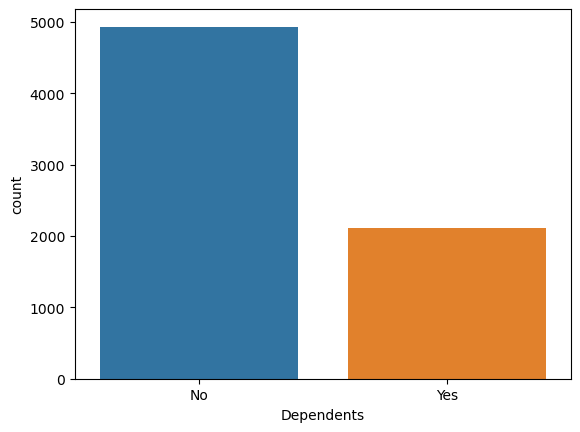

In [63]:
sns.countplot(x="Dependents", data =df);

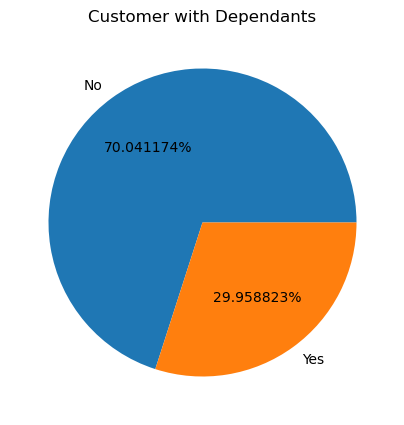

In [64]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Dependents"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer with Dependants")
plt.show()

### Narration
percentage of customers with dependants(29.9%) with the company is a greatly lower with those that has no dependants (70.1%)

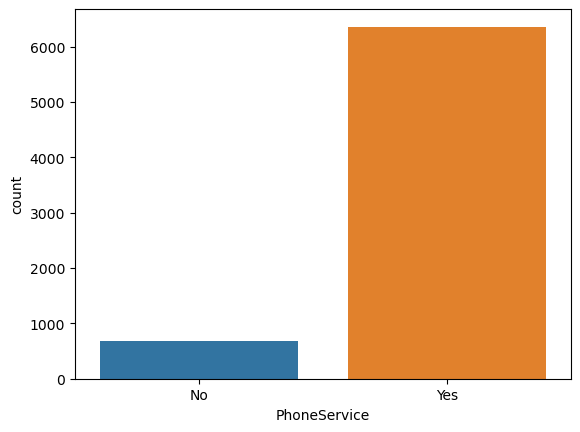

In [65]:
sns.countplot(x="PhoneService", data =df);

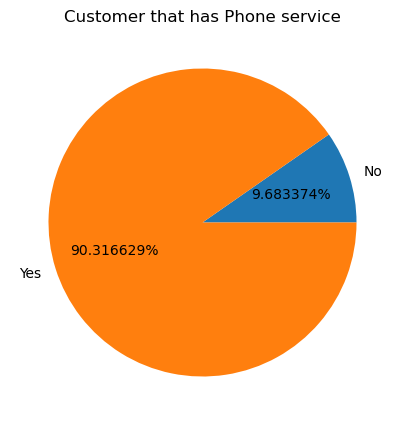

In [66]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["PhoneService"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer that has Phone service")
plt.show()

### Narration
percentage of customers that has phone service(90.3%) with the company is a greatly higher with those that has no phone service (9.7%)

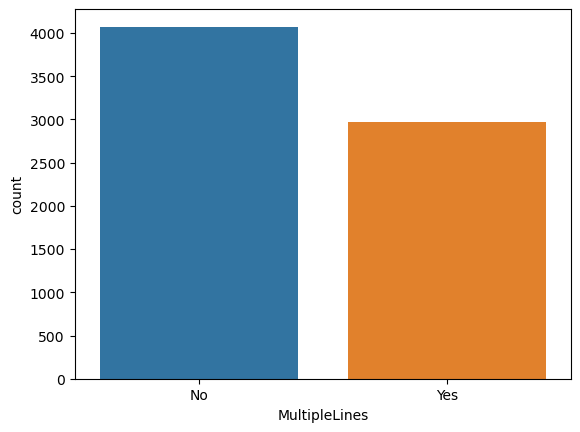

In [67]:
sns.countplot(x="MultipleLines", data =df);

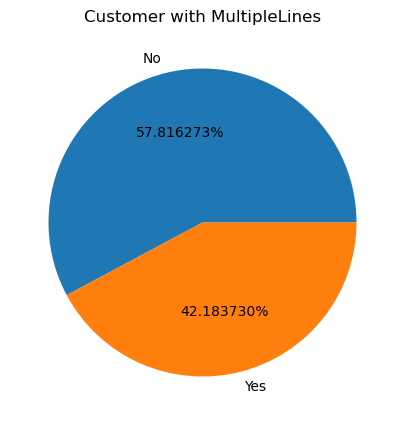

In [68]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["MultipleLines"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer with MultipleLines")
plt.show()

### Narration
Percentage of customers that has Multiple Lines(42.1%)  is slightly lower with those that has no Multiple Lines (57.8%)

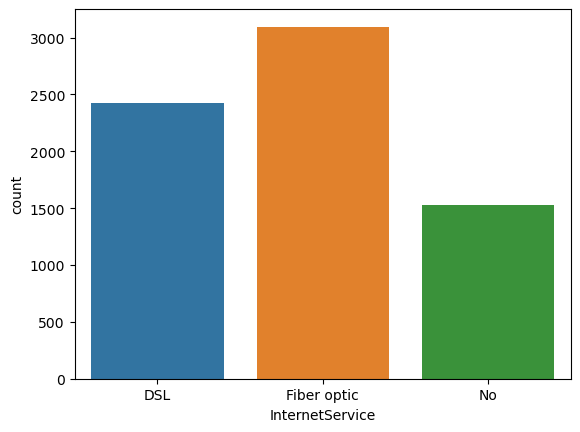

In [69]:
sns.countplot(x="InternetService", data =df);

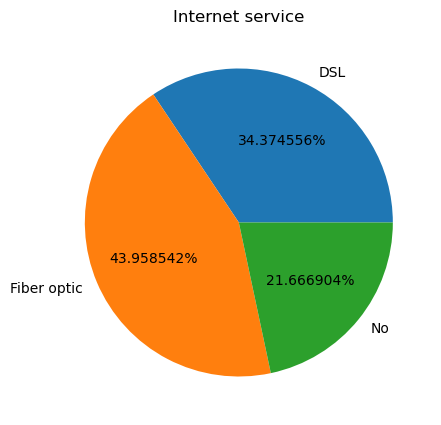

In [70]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["InternetService"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Internet service")
plt.show()

### Narration
Percentage of customers that has Internet service using Fibre optic is (43.9%), followed by DSL(34.4%) with No internet service been the least(21.7%)

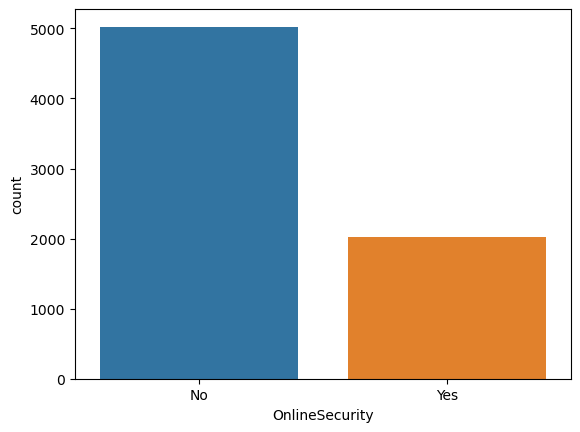

In [71]:
sns.countplot(x="OnlineSecurity", data =df);

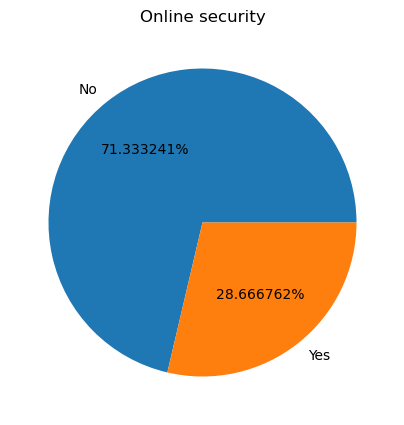

In [72]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["OnlineSecurity"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Online security")
plt.show()

### Narration
Percentage of customers that has Online Security(28.7%) is lower than those that has no Online Secrity (71.3%)

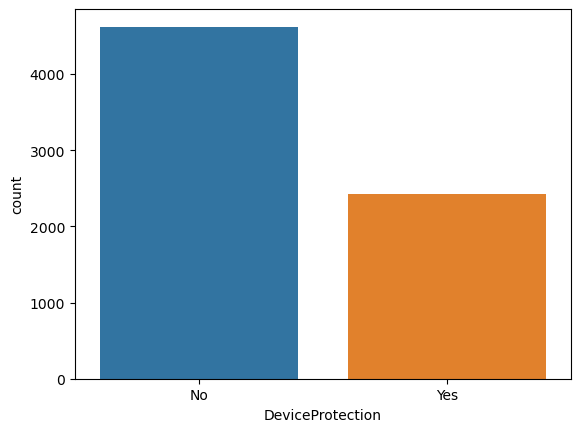

In [73]:
sns.countplot(x="DeviceProtection", data =df);

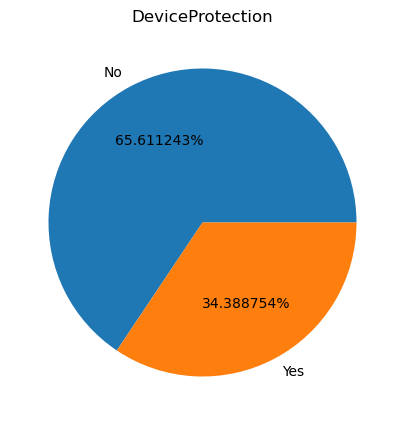

In [74]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["DeviceProtection"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("DeviceProtection")
plt.show()

### Narration
Percentage of customers that has Device Protection(34.4%)  is lower thanthose that has no Device Protection (65.6%)

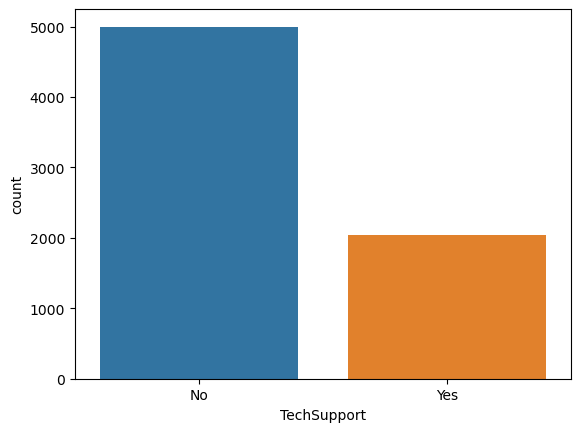

In [75]:
sns.countplot(x="TechSupport", data =df);

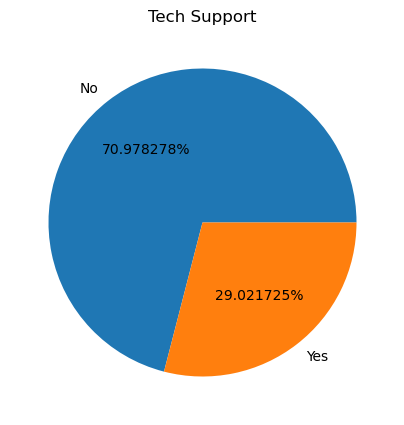

In [76]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["TechSupport"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Tech Support")
plt.show()

with Tech support  29%, without tech support (71%)

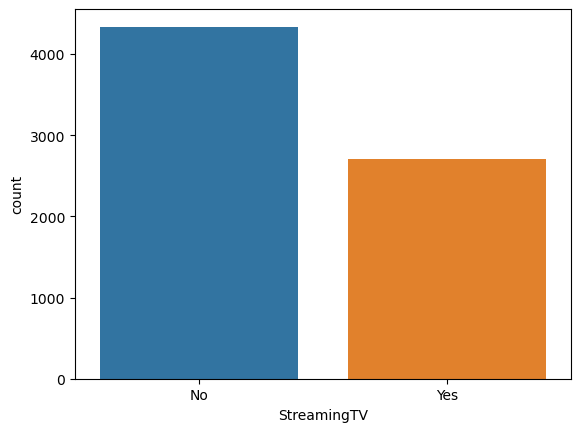

In [77]:
sns.countplot(x="StreamingTV", data =df);

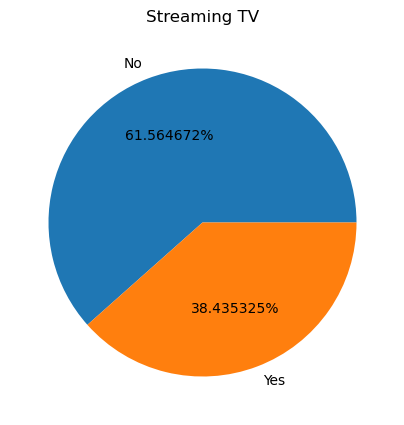

In [78]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["StreamingTV"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Streaming TV")
plt.show()

### Narration
Percentage of customers that has streaming TV service activated(38.4%)  is lower than those that doen't (61.6%)

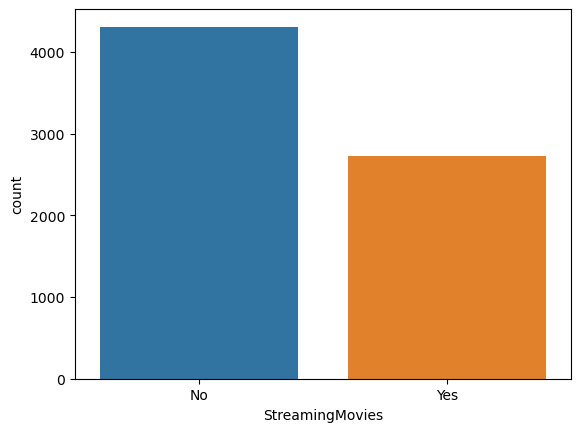

In [79]:
sns.countplot(x="StreamingMovies", data =df);

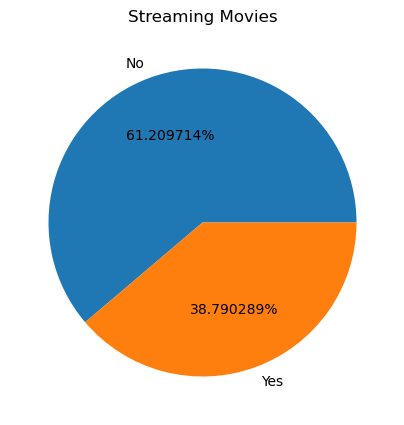

In [80]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["StreamingMovies"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Streaming Movies")
plt.show()

### Narration
Percentage of customers that has streaming movies service activated is(38.8%)  while those that do no have(61.2%)

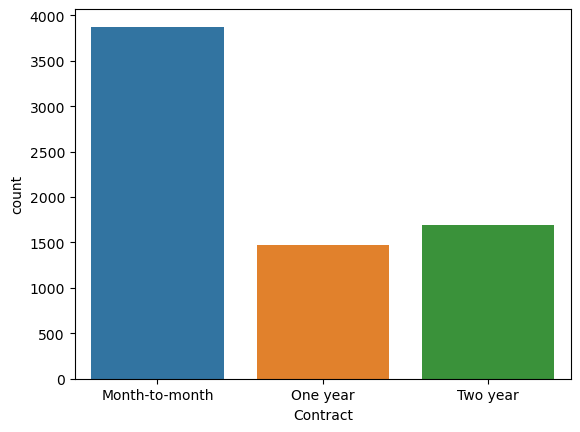

In [81]:
sns.countplot(x="Contract", data =df);

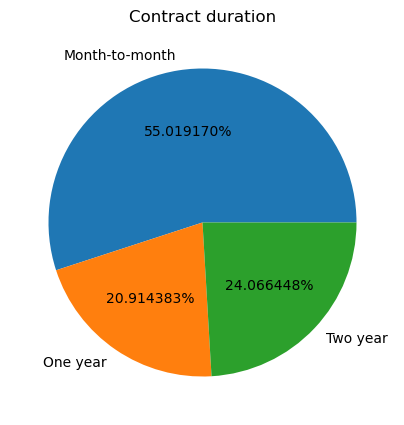

In [82]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Contract"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Contract duration")
plt.show()

### Narration
Customer contract duration is more of Month-to-month (55%) followed by two year(24%)and the least one year (21%)

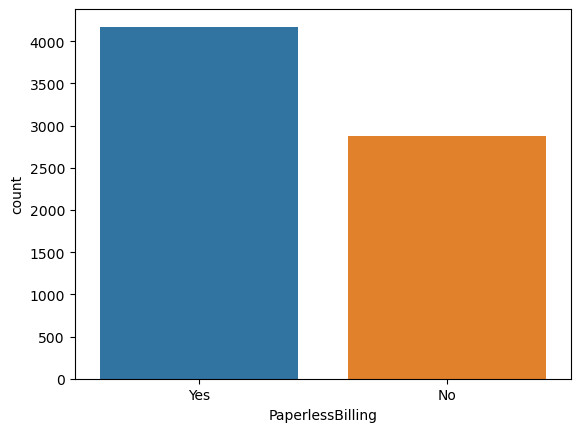

In [83]:
sns.countplot(x="PaperlessBilling", data =df);

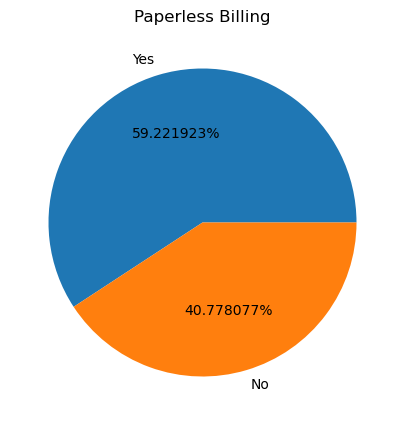

In [84]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["PaperlessBilling"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Paperless Billing")
plt.show()

### Narration
Percentage of customers that do Paperless billing(59.2%) while those that doesn't (40.8%)

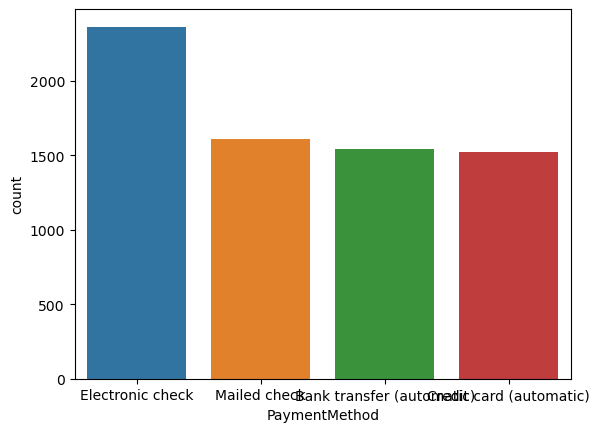

In [85]:
sns.countplot(x="PaymentMethod", data =df);

The count of customers using Electronic check as a payment method is more than other payment method, folowed by Mailed checked, Bank transfer (automatic), card (automatic) respectively 

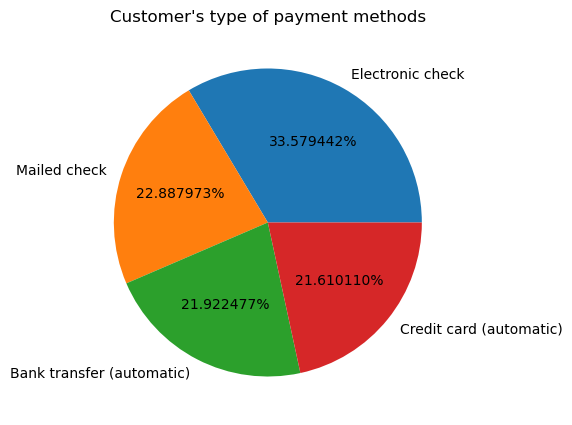

In [86]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["PaymentMethod"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer's type of payment methods")
plt.show()

### Narration
Type of payment Method
- Electronic check(33.6%), Mail check(22.9%)
- Bank Transfer(automatic) is 21.9% while Credit Card (automation) is 21.6%

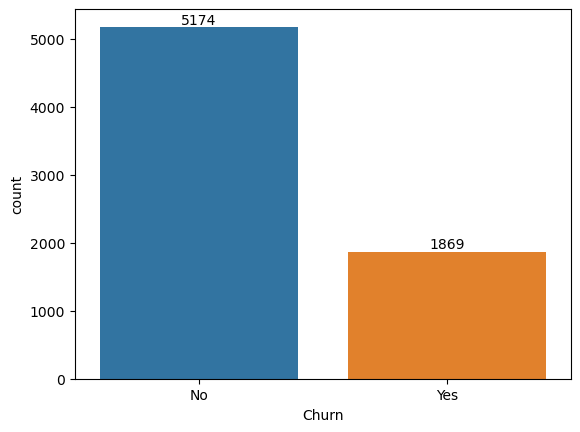

In [87]:
ax= sns.countplot(x=df["Churn"], order=df["Churn"].value_counts(ascending=False).index)
values= df["Churn"].value_counts(ascending= False).values
ax.bar_label(container=ax.containers[0], labels=values);

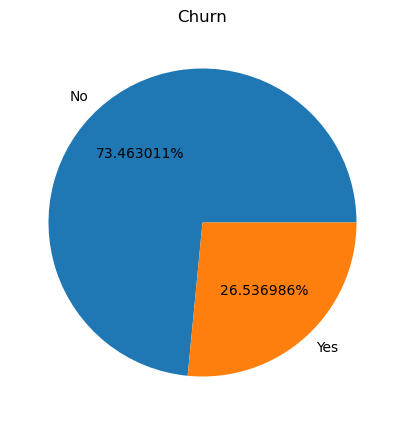

In [88]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Churn")
plt.show()

The Percentage of Customer who has left the company or stop using the network service is (26.5%) while those who are still using the company service is (73.5%)

In [89]:
def sen_citzn(x):
    if x == 0:
        return "No"
    else:
        return "Yes"
df["SeniorCitizen"] = df['SeniorCitizen'].apply(sen_citzn)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


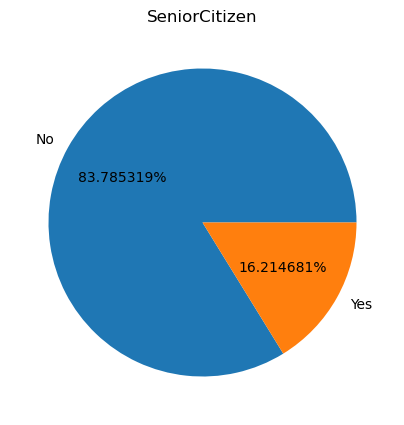

In [90]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["SeniorCitizen"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("SeniorCitizen")
plt.show()

Customers who fall in senoir citizen category is (16.2%) while those who are not senior citizen are (83.8%)

In [91]:
 # Group tenure duration
x = df["tenure"]
def tenure_group(x):
    if x <= 10:
        return "0 - 10"
    elif x <= 21:
        return "11 - 21"
    elif x <= 31:
        return "22 - 31"
    elif x <= 41:
        return "32 - 41"
    elif x <= 51:
        return "42 - 51"
    elif x <= 61:
        return "52 - 61"
    else:
        return "62 - 75"
    
# Apply function to the data
df["tenure_duration"]= x.apply(tenure_group)

df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 - 10
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,32 - 41
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 - 10


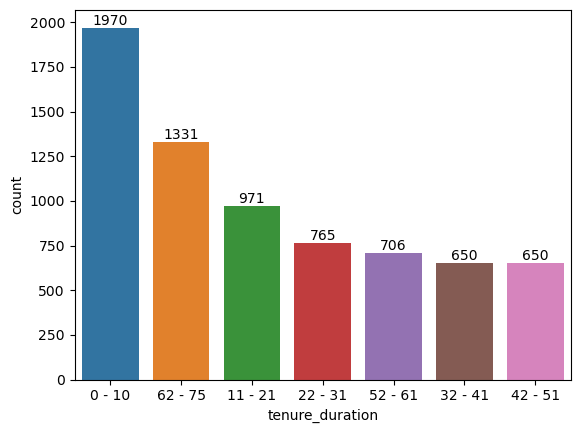

In [92]:
ax= sns.countplot(x=df["tenure_duration"], order=df["tenure_duration"].value_counts(ascending=False).index)
values= df["tenure_duration"].value_counts(ascending= False).values
ax.bar_label(container=ax.containers[0], labels=values);

Count of the tenure duration 0 to 10 is is the highest

### Bivariate Analysis

Text(0.5, 1.0, 'Monthly charges per Customer with multiple lines')

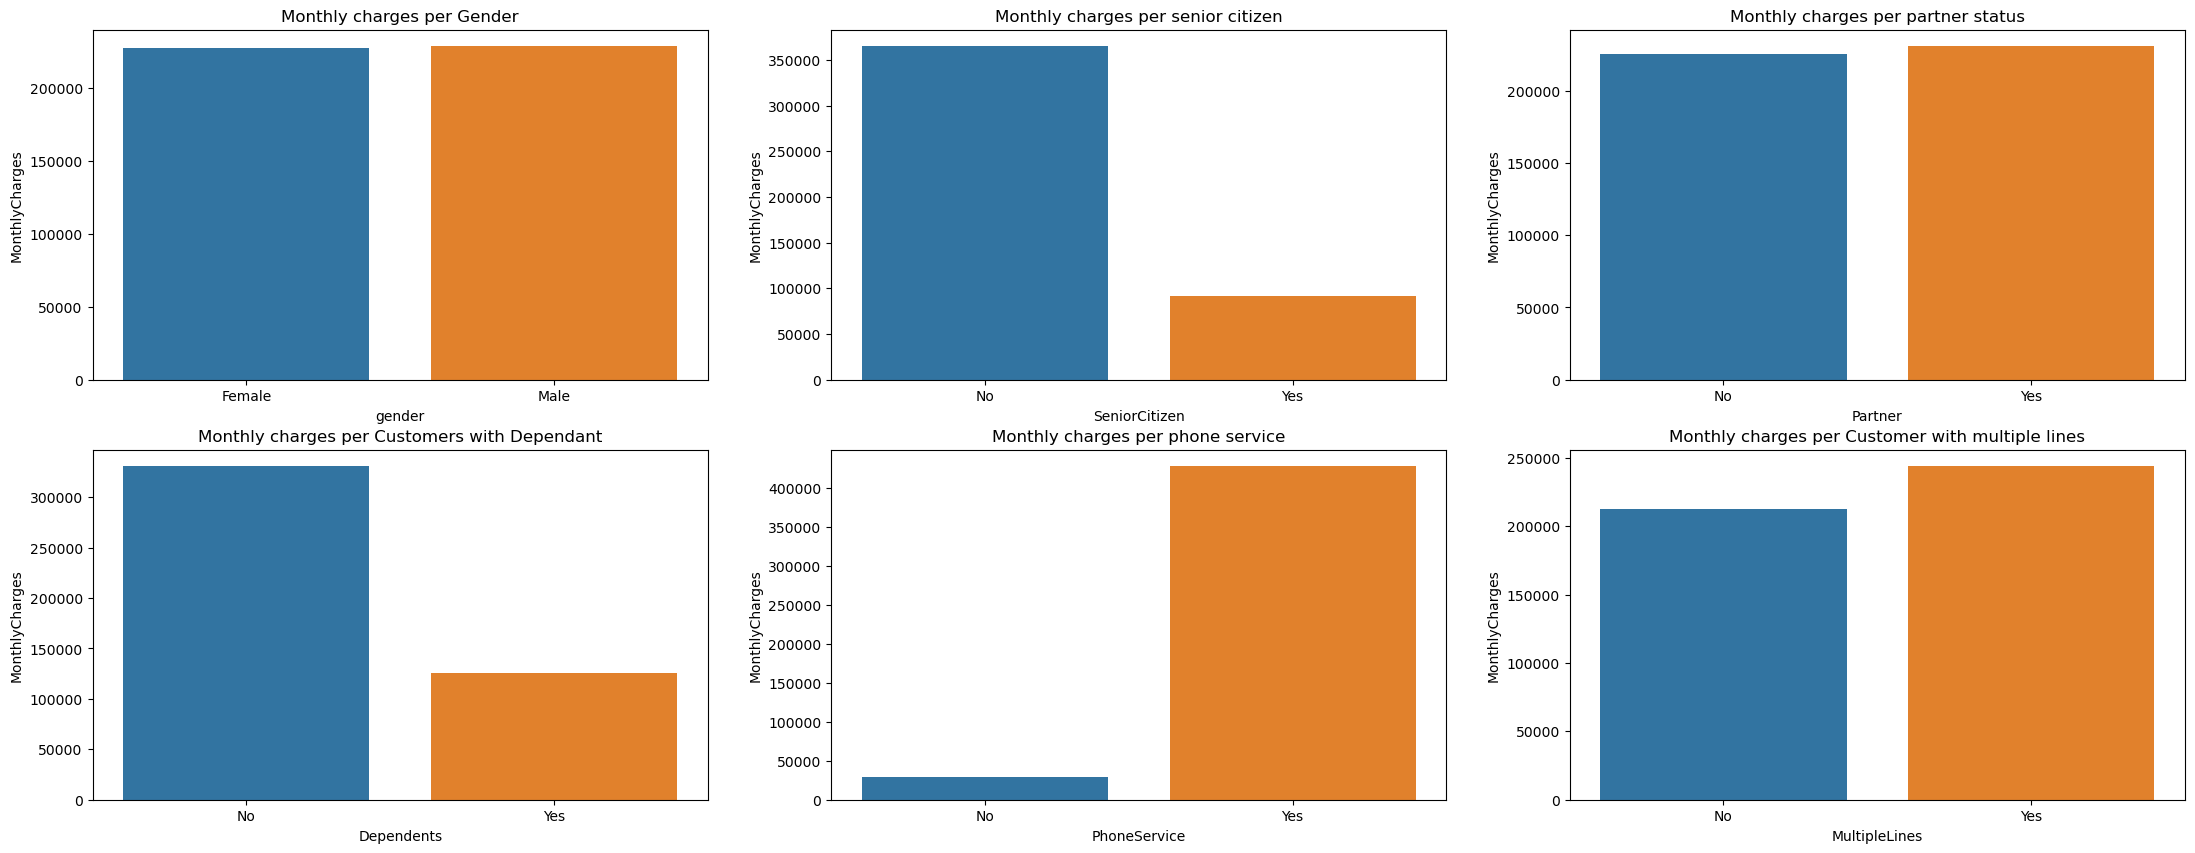

In [93]:
# Categorical Columns

fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

gen_mon = df.groupby("gender")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='gender', data= gen_mon, y= 'MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title("Monthly charges per Gender")

sen_mon = df.groupby("SeniorCitizen")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='SeniorCitizen', data= sen_mon, y= 'MonthlyCharges', ax=axs[0,1])
axs[0,1].set_title("Monthly charges per senior citizen")

part_mon = df.groupby("Partner")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Partner', data= part_mon, y= 'MonthlyCharges', ax=axs[0,2])
axs[0,2].set_title("Monthly charges per partner status")

dep_mon = df.groupby("Dependents")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Dependents', data= dep_mon, y= 'MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title("Monthly charges per Customers with Dependant")


phon_mon = df.groupby("PhoneService")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='PhoneService', data=phon_mon , y= 'MonthlyCharges', ax=axs[1,1])
axs[1,1].set_title("Monthly charges per phone service")


mult_mon = df.groupby("MultipleLines")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='MultipleLines', data= mult_mon, y= 'MonthlyCharges', ax=axs[1,2])
axs[1,2].set_title("Monthly charges per Customer with multiple lines")


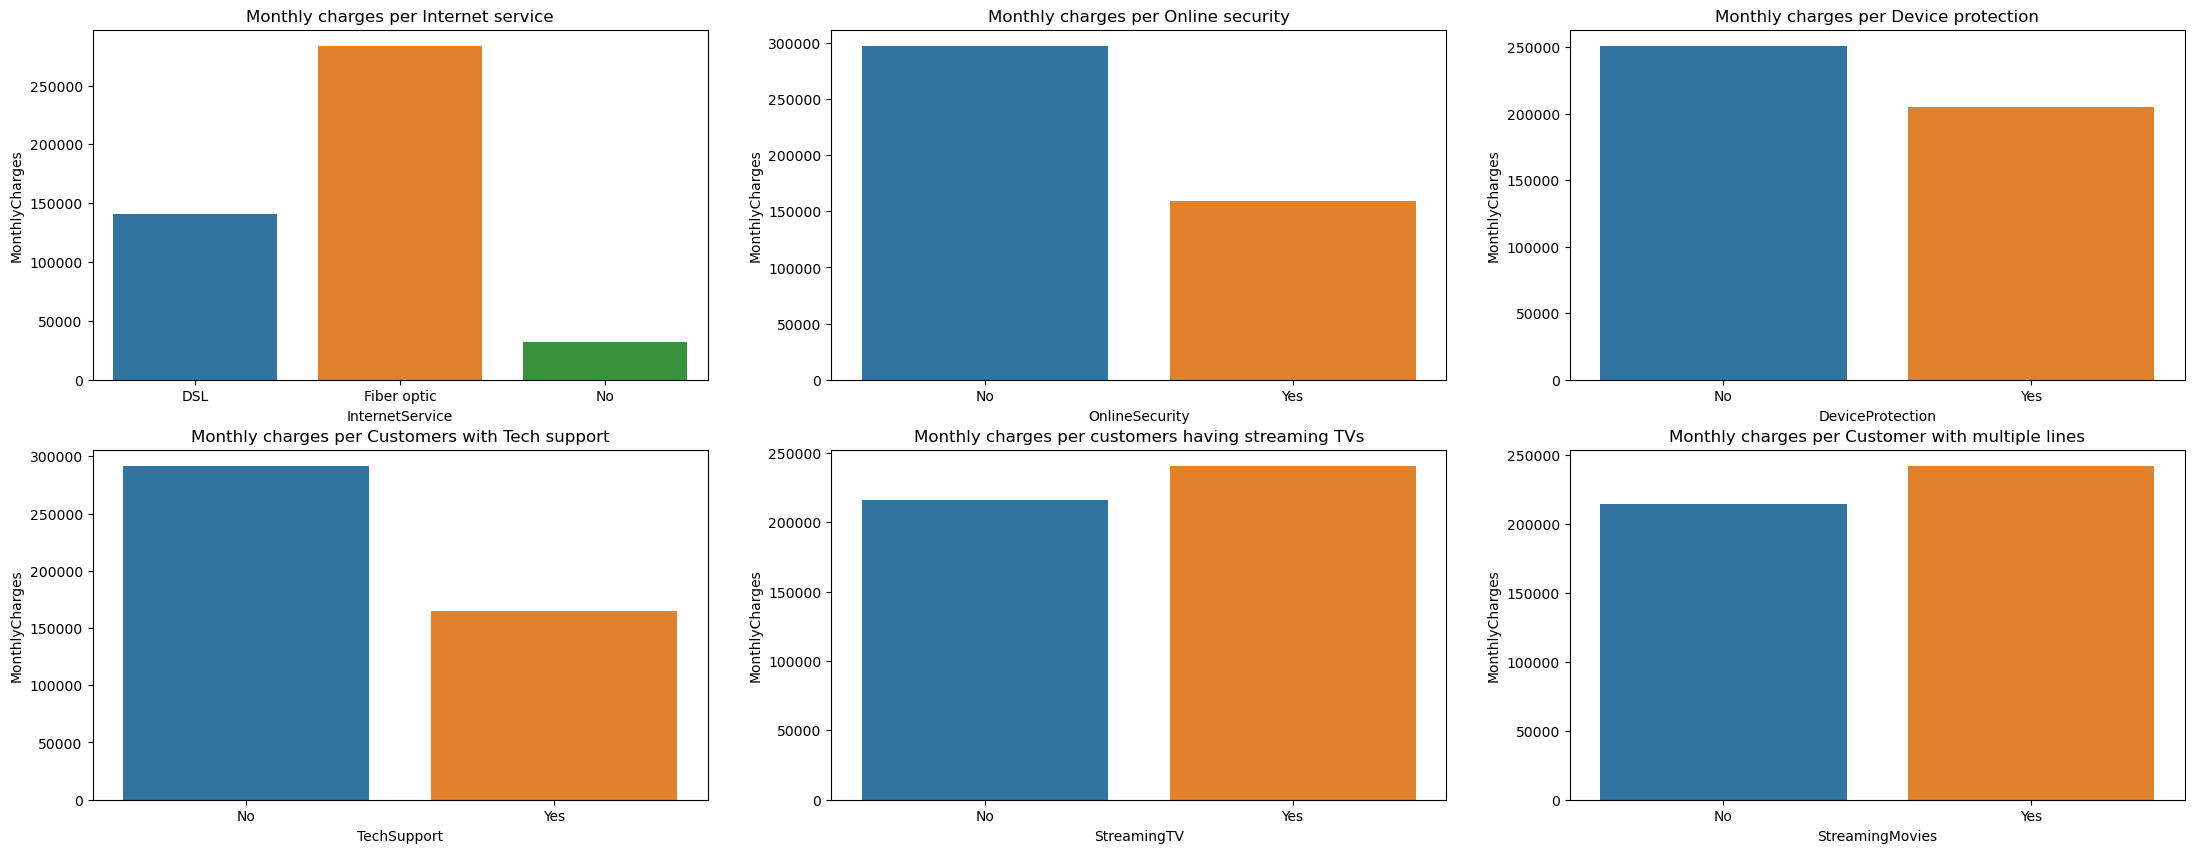

In [94]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

int_mon = df.groupby("InternetService")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='InternetService', data= int_mon, y= 'MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title("Monthly charges per Internet service")

on_mon = df.groupby("OnlineSecurity")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='OnlineSecurity', data= on_mon, y= 'MonthlyCharges', ax=axs[0,1])
axs[0,1].set_title("Monthly charges per Online security")

dev_mon = df.groupby("DeviceProtection")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='DeviceProtection', data= dev_mon, y= 'MonthlyCharges', ax=axs[0,2])
axs[0,2].set_title("Monthly charges per Device protection")

tech_mon = df.groupby("TechSupport")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='TechSupport', data= tech_mon, y= 'MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title("Monthly charges per Customers with Tech support")


st_mon = df.groupby("StreamingTV")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='StreamingTV', data=st_mon , y= 'MonthlyCharges', ax=axs[1,1])
axs[1,1].set_title("Monthly charges per customers having streaming TVs")


sm_mon = df.groupby("StreamingMovies")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='StreamingMovies', data= sm_mon, y= 'MonthlyCharges', ax=axs[1,2])
axs[1,2].set_title("Monthly charges per Customer with multiple lines");

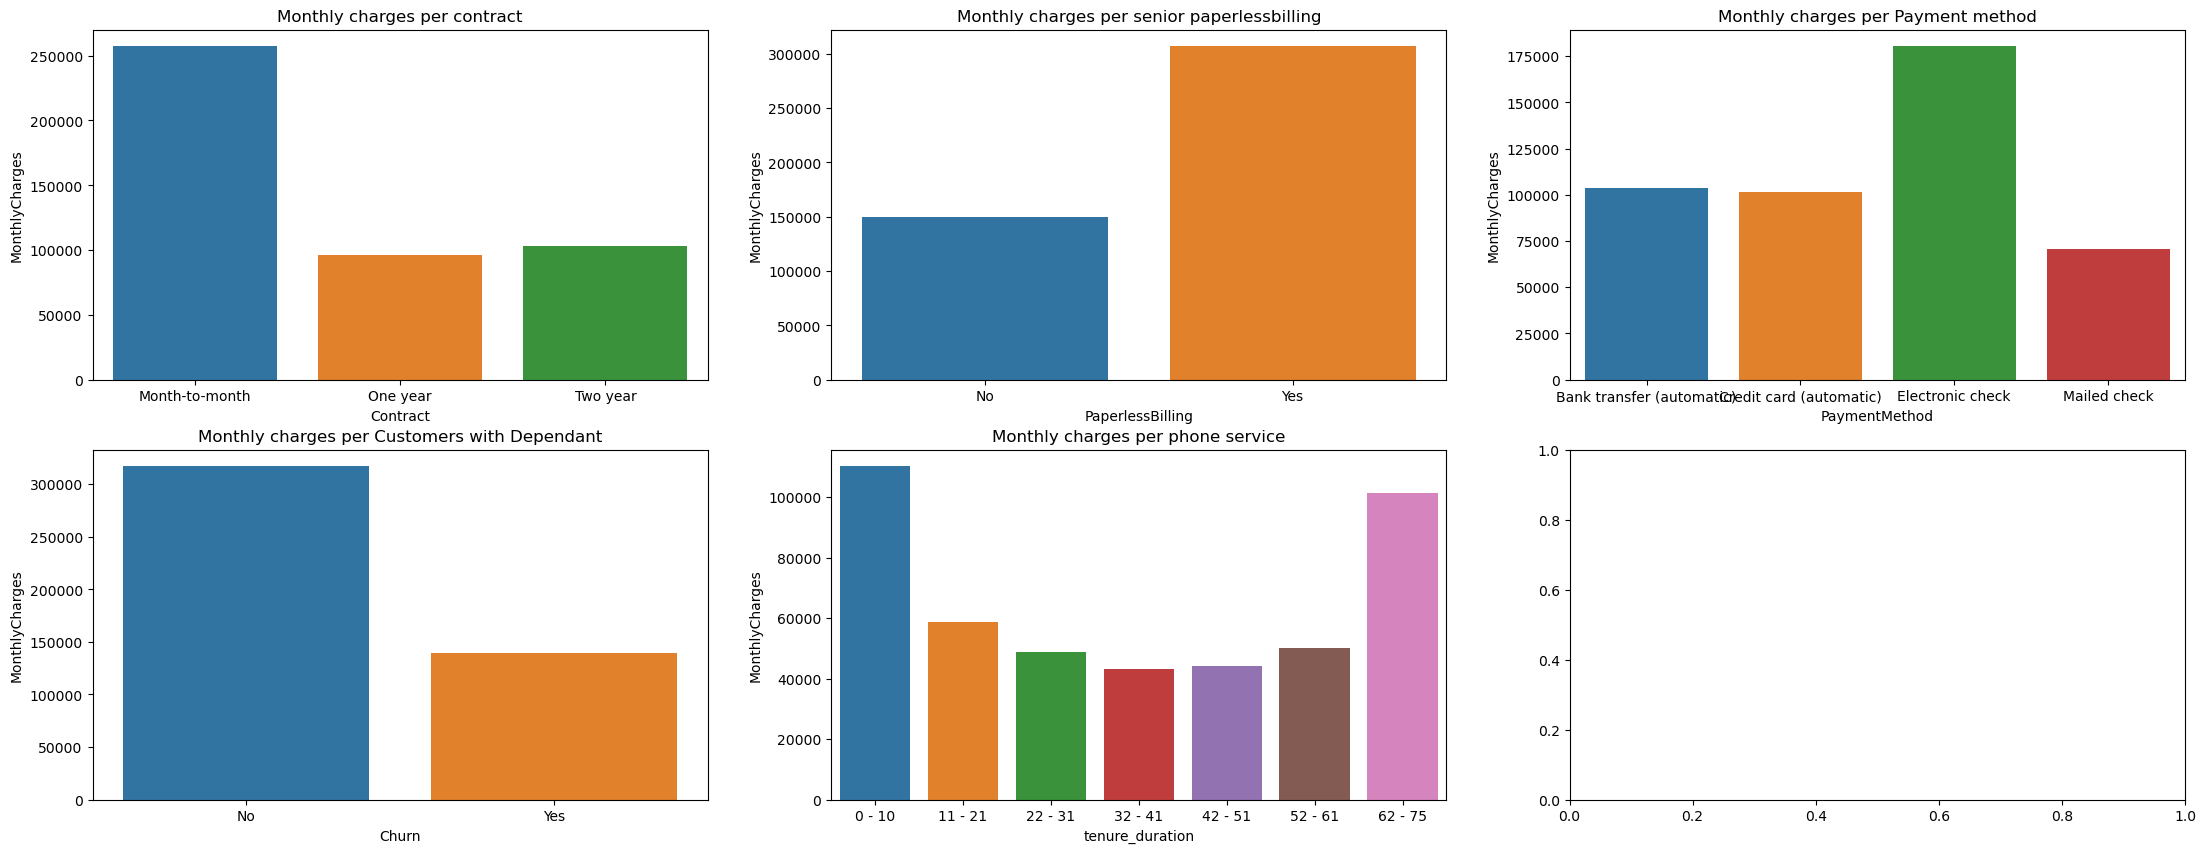

In [95]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

con_mon = df.groupby("Contract")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Contract', data= con_mon, y= 'MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title("Monthly charges per contract")

pap_mon = df.groupby("PaperlessBilling")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='PaperlessBilling', data= pap_mon, y= 'MonthlyCharges', ax=axs[0,1])
axs[0,1].set_title("Monthly charges per senior paperlessbilling")

pay_mon = df.groupby("PaymentMethod")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='PaymentMethod', data= pay_mon, y= 'MonthlyCharges', ax=axs[0,2])
axs[0,2].set_title("Monthly charges per Payment method")

churn_mon = df.groupby("Churn")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Churn', data= churn_mon, y= 'MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title("Monthly charges per Customers with Dependant")


ten_mon = df.groupby("tenure_duration")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='tenure_duration', data=ten_mon , y= 'MonthlyCharges', ax=axs[1,1])
axs[1,1].set_title("Monthly charges per phone service");

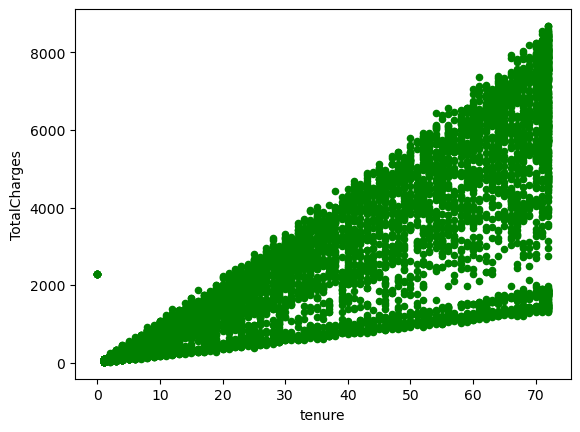

In [96]:
df.plot(kind='scatter',x='tenure', y='TotalCharges', c=['Green'])
plt.show()

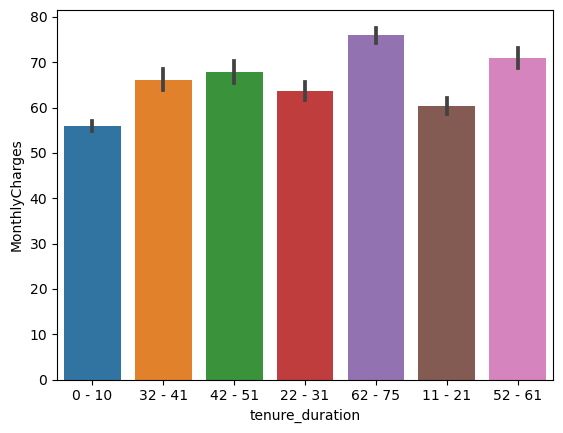

In [97]:
 sns.barplot (x='tenure_duration', data= df, y= 'MonthlyCharges');

Even though the count of customer with tenure duration 0 to 10 is the highest, 62 to 75 tends to generated highest monthly revenue  followed by 52 to 61 
- In sum; the higher the tenure duration the higher the monthly revenue generated

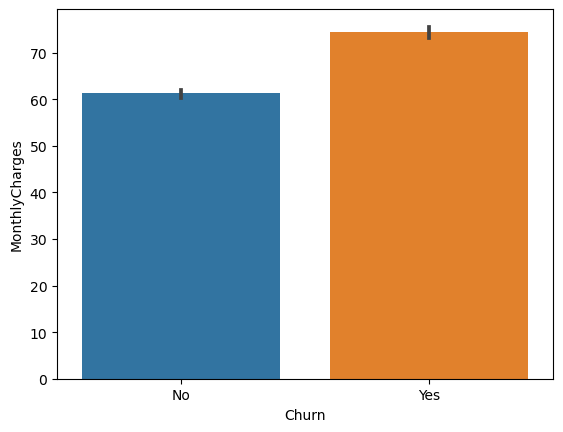

In [98]:
sns.barplot (x='Churn', data= df, y= 'MonthlyCharges');

Customers who genenrated highest monthly revenue has churn

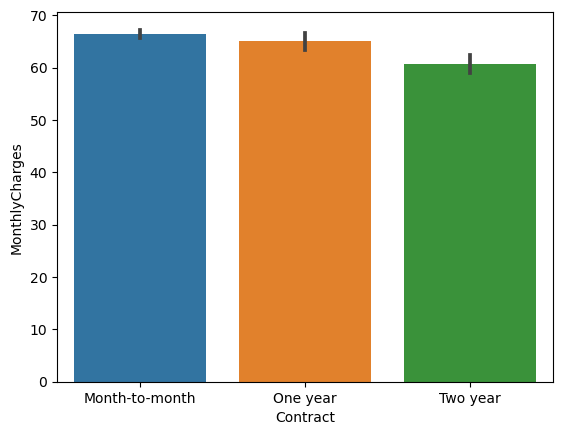

In [99]:
sns.barplot (x='Contract', data= df, y= 'MonthlyCharges');

Highest monthly revenue was generated from customer who signed month-to-month contract followed by one year contract with the least two year contract 

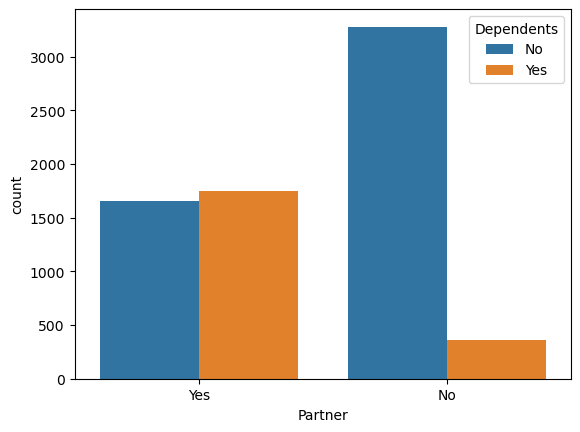

In [100]:
sns.countplot(x="Partner", data =df, hue = 'Dependents');

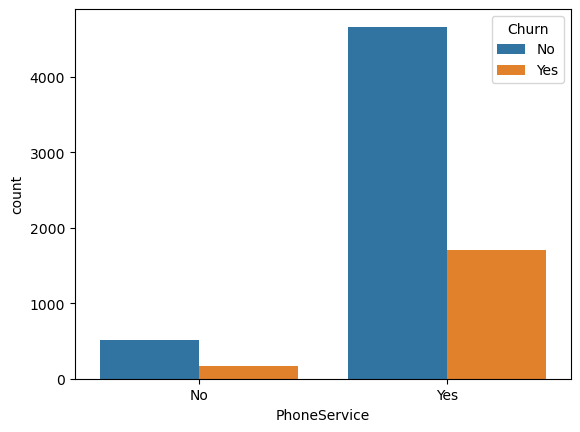

In [101]:
sns.countplot(x="PhoneService", data =df, hue = 'Churn');

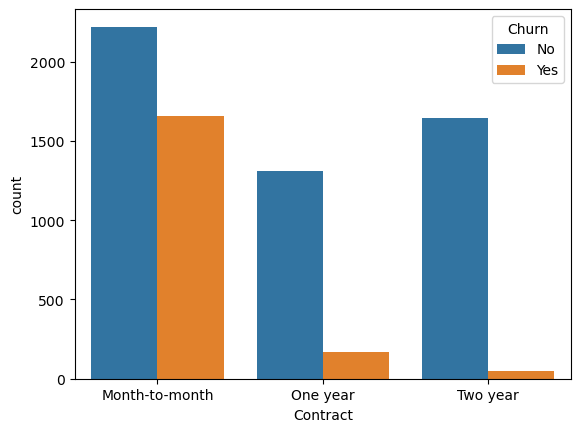

In [102]:
sns.countplot(x="Contract", data =df, hue = 'Churn');

Customer churn reduces with lenght contract duration signed 

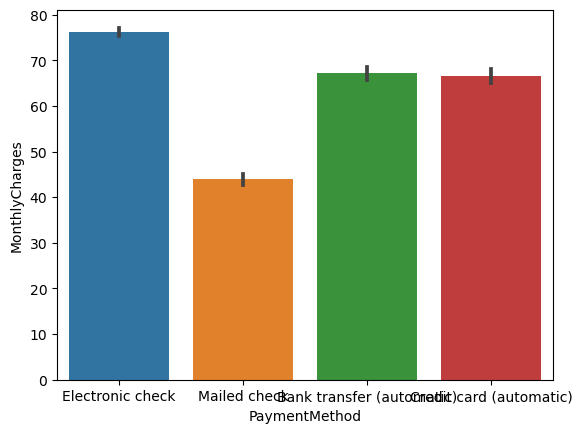

In [103]:
sns.barplot (x='PaymentMethod', data= df, y= 'MonthlyCharges');

Customer using Electronic check generated highest revenue followed by Bank transfer, card and mail check being the least

Text(0.5, 1.0, 'Total Charges per Customer with multiple lines')

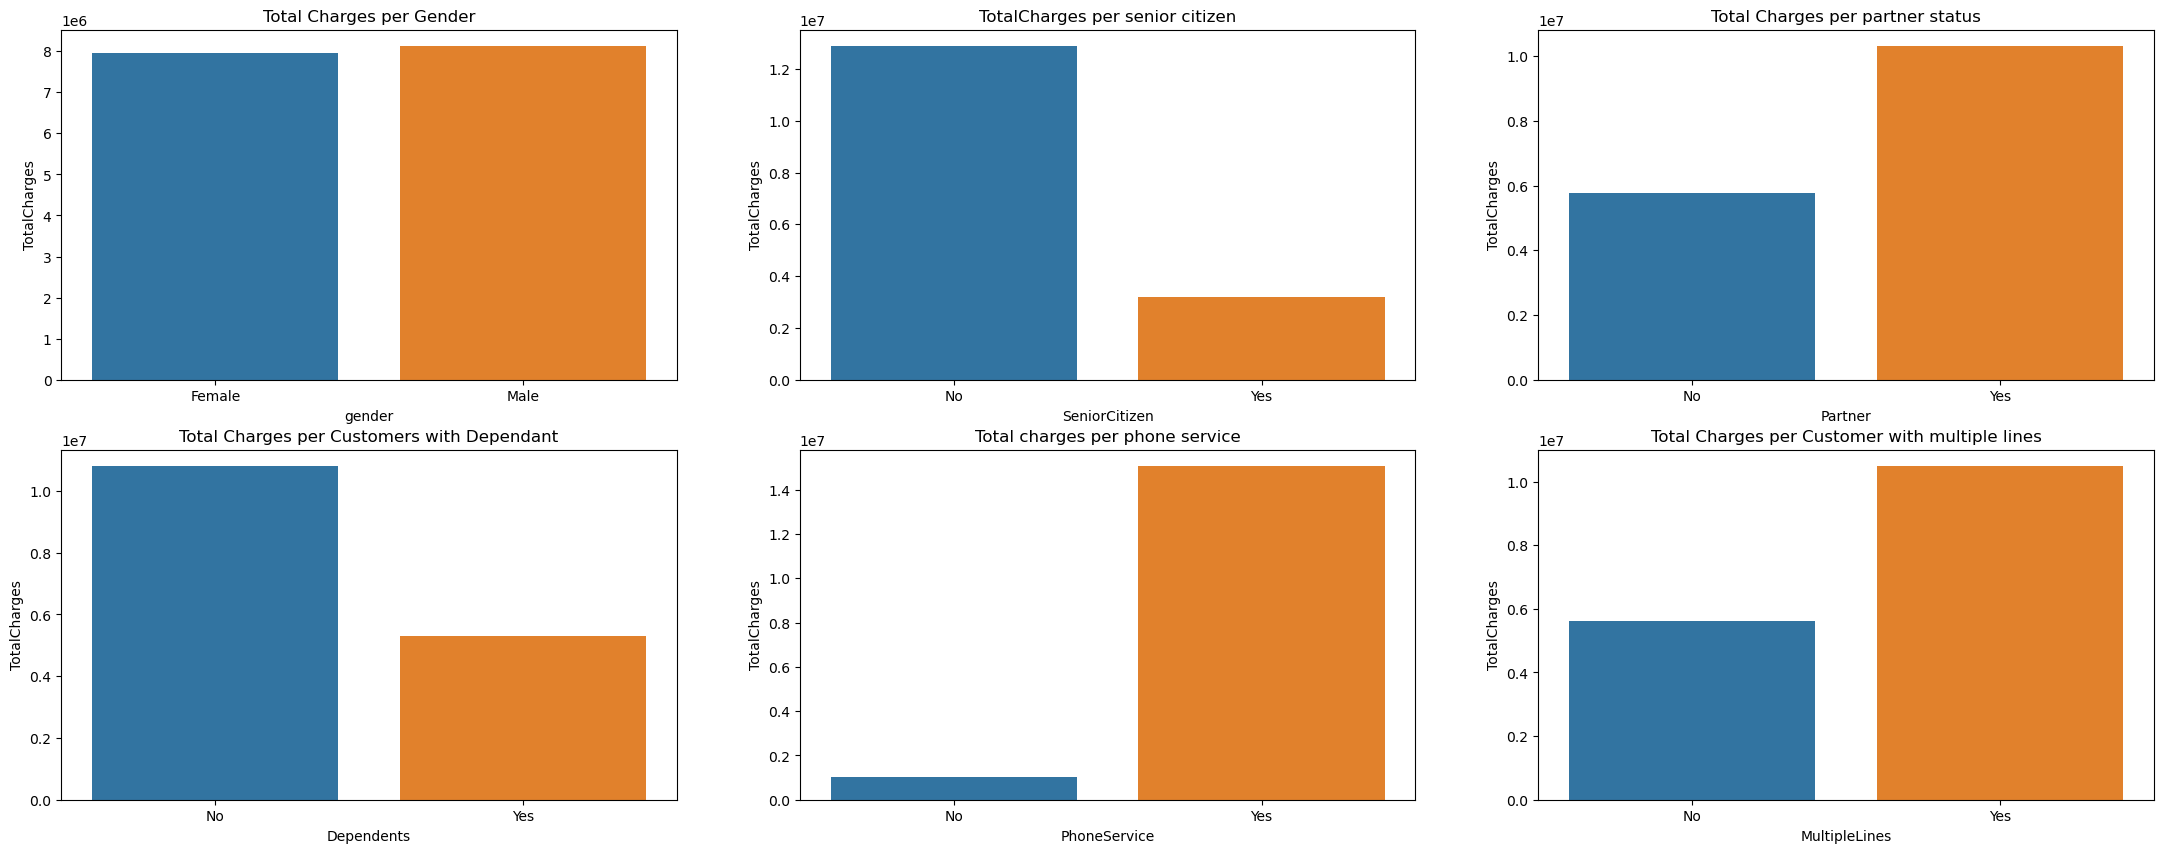

In [104]:
# categorical column per total charges

fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

gen_mon = df.groupby("gender")["TotalCharges"].sum().reset_index()
sns.barplot(x='gender', data= gen_mon, y= 'TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total Charges per Gender")

sen_mon = df.groupby("SeniorCitizen")["TotalCharges"].sum().reset_index()
sns.barplot(x='SeniorCitizen', data= sen_mon, y= 'TotalCharges', ax=axs[0,1])
axs[0,1].set_title("TotalCharges per senior citizen")

part_mon = df.groupby("Partner")["TotalCharges"].sum().reset_index()
sns.barplot(x='Partner', data= part_mon, y= 'TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges per partner status")

dep_mon = df.groupby("Dependents")["TotalCharges"].sum().reset_index()
sns.barplot(x='Dependents', data= dep_mon, y= 'TotalCharges', ax=axs[1,0])
axs[1,0].set_title("Total Charges per Customers with Dependant")


phon_mon = df.groupby("PhoneService")["TotalCharges"].sum().reset_index()
sns.barplot(x='PhoneService', data=phon_mon , y= 'TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total charges per phone service")


mult_mon = df.groupby("MultipleLines")["TotalCharges"].sum().reset_index()
sns.barplot(x='MultipleLines', data= mult_mon, y= 'TotalCharges', ax=axs[1,2])
axs[1,2].set_title("Total Charges per Customer with multiple lines")


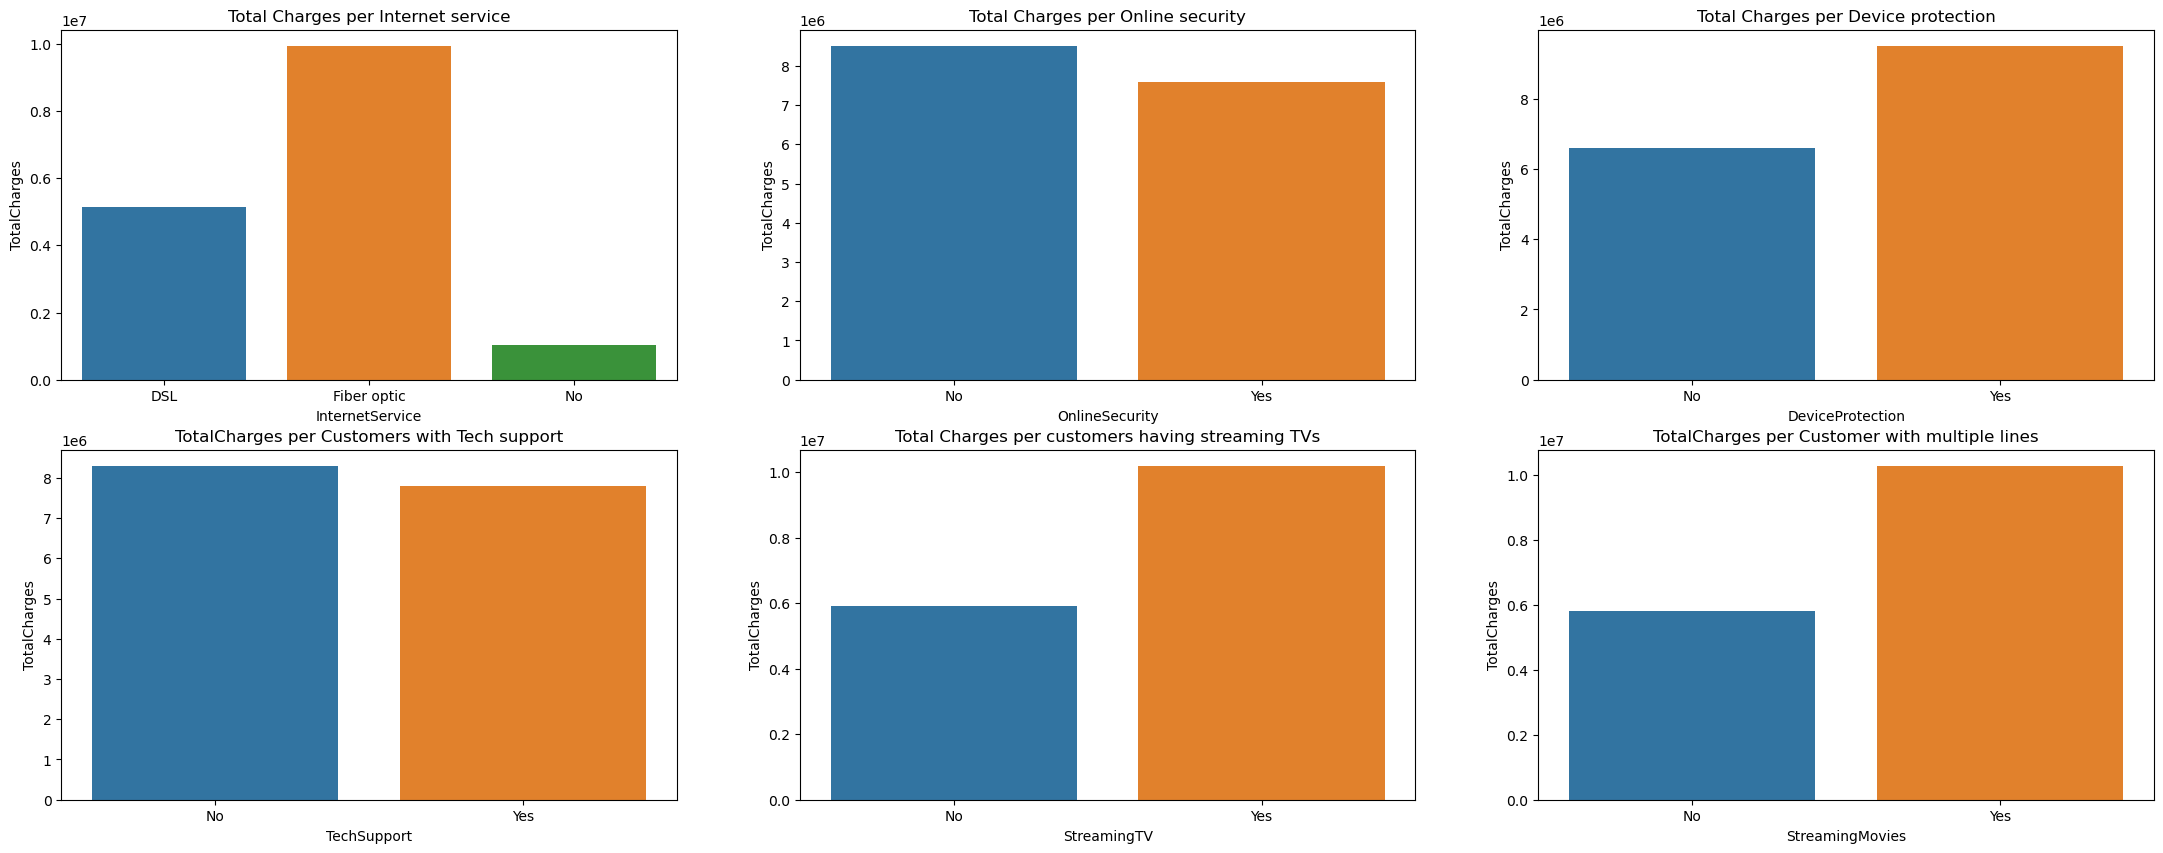

In [105]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

int_mon = df.groupby("InternetService")["TotalCharges"].sum().reset_index()
sns.barplot(x='InternetService', data= int_mon, y= 'TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total Charges per Internet service")

on_mon = df.groupby("OnlineSecurity")["TotalCharges"].sum().reset_index()
sns.barplot(x='OnlineSecurity', data= on_mon, y= 'TotalCharges', ax=axs[0,1])
axs[0,1].set_title("Total Charges per Online security")

dev_mon = df.groupby("DeviceProtection")["TotalCharges"].sum().reset_index()
sns.barplot(x='DeviceProtection', data= dev_mon, y= 'TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges per Device protection")

tech_mon = df.groupby("TechSupport")["TotalCharges"].sum().reset_index()
sns.barplot(x='TechSupport', data= tech_mon, y= 'TotalCharges', ax=axs[1,0])
axs[1,0].set_title("TotalCharges per Customers with Tech support")


st_mon = df.groupby("StreamingTV")["TotalCharges"].sum().reset_index()
sns.barplot(x='StreamingTV', data=st_mon , y= 'TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total Charges per customers having streaming TVs")


sm_mon = df.groupby("StreamingMovies")["TotalCharges"].sum().reset_index()
sns.barplot(x='StreamingMovies', data= sm_mon, y= 'TotalCharges', ax=axs[1,2])
axs[1,2].set_title("TotalCharges per Customer with multiple lines");

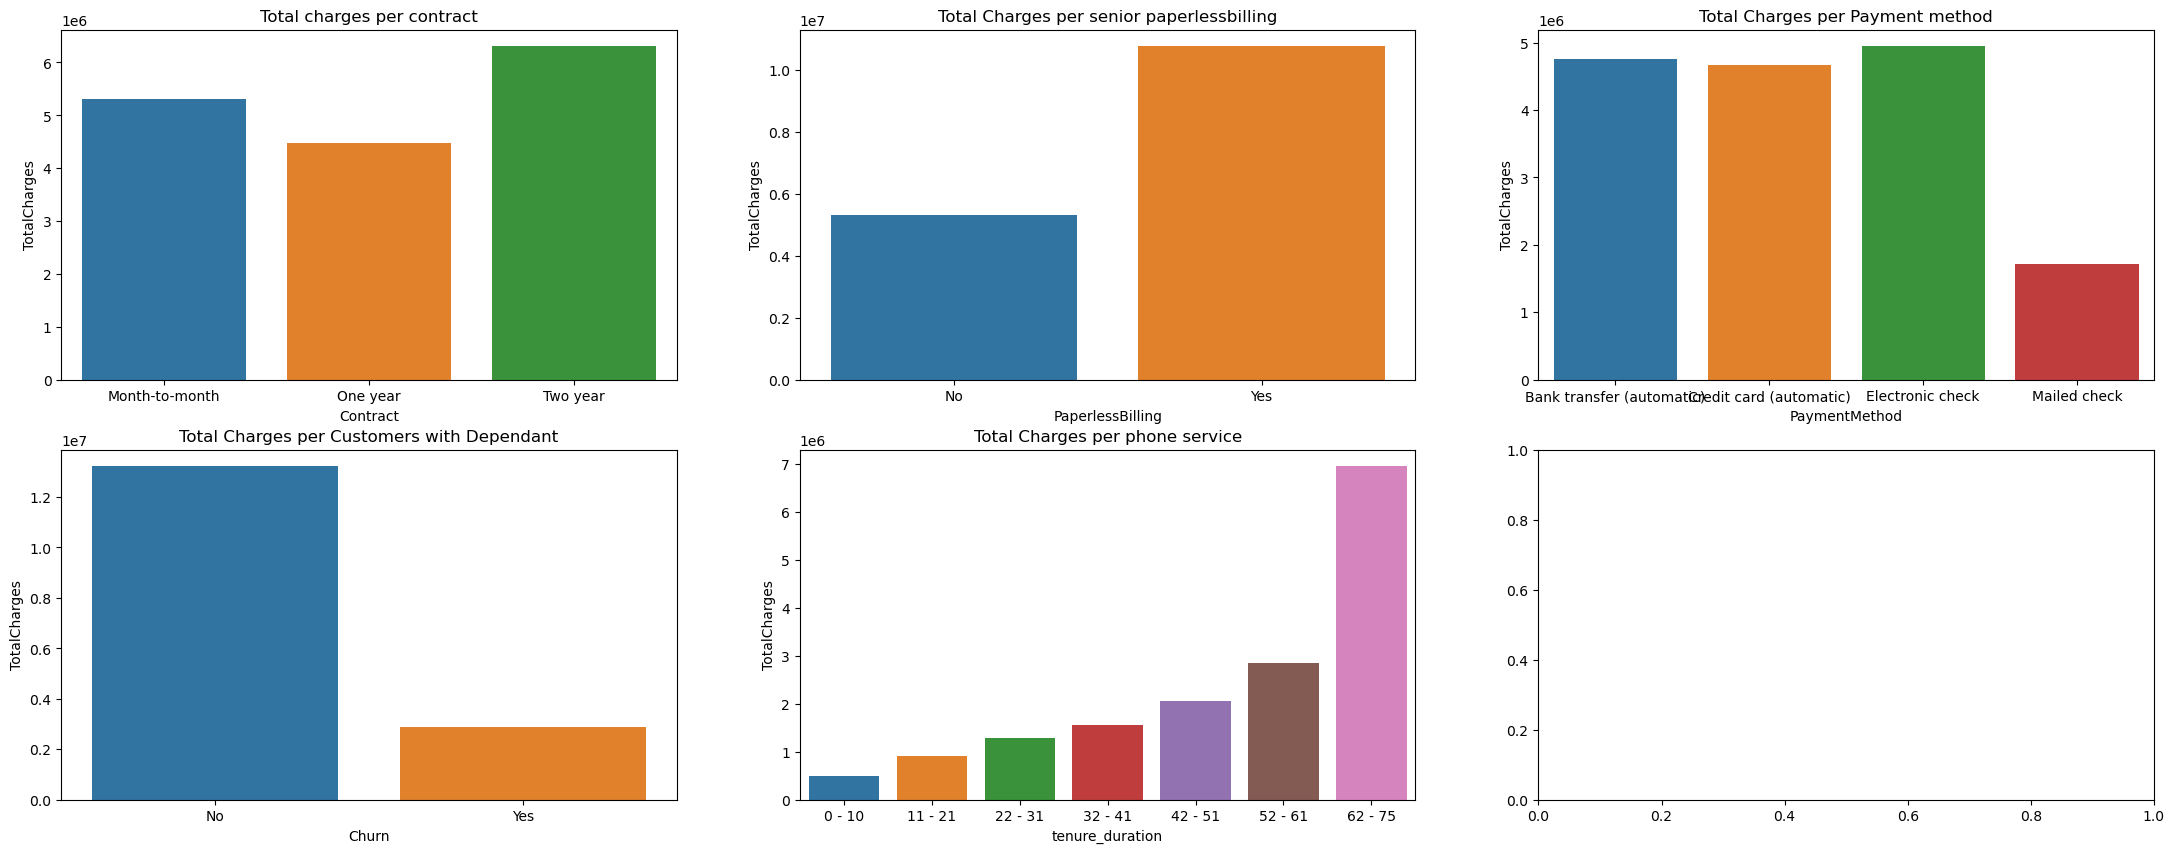

In [106]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

con_mon = df.groupby("Contract")["TotalCharges"].sum().reset_index()
sns.barplot(x='Contract', data= con_mon, y= 'TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total charges per contract")

pap_mon = df.groupby("PaperlessBilling")["TotalCharges"].sum().reset_index()
sns.barplot(x='PaperlessBilling', data= pap_mon, y= 'TotalCharges', ax=axs[0,1])
axs[0,1].set_title("Total Charges per senior paperlessbilling")

pay_mon = df.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()
sns.barplot(x='PaymentMethod', data= pay_mon, y= 'TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges per Payment method")

churn_mon = df.groupby("Churn")["TotalCharges"].sum().reset_index()
sns.barplot(x='Churn', data= churn_mon, y= 'TotalCharges', ax=axs[1,0])
axs[1,0].set_title("Total Charges per Customers with Dependant")


ten_mon = df.groupby("tenure_duration")["TotalCharges"].sum().reset_index()
sns.barplot(x='tenure_duration', data=ten_mon , y= 'TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total Charges per phone service");

<Axes: xlabel='Churn', ylabel='TotalCharges'>

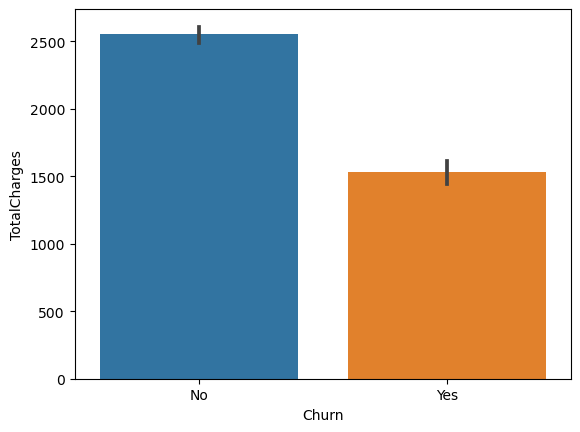

In [107]:
 sns.barplot (x='Churn', data= df, y= 'TotalCharges')

Revenue generated by Customers who has churned is more than half of the total revenue of those who has not cancelled services

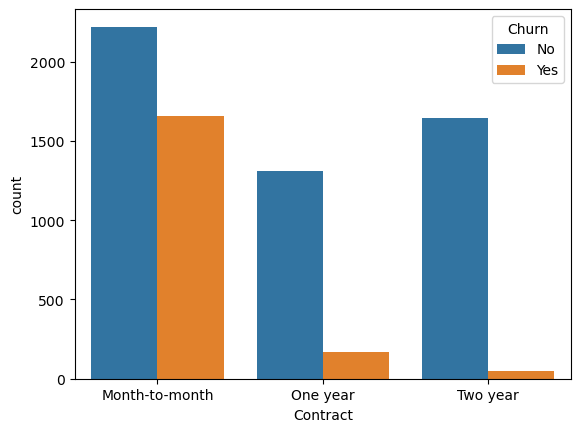

In [108]:
 sns.countplot (x='Contract', data= df, hue= 'Churn');

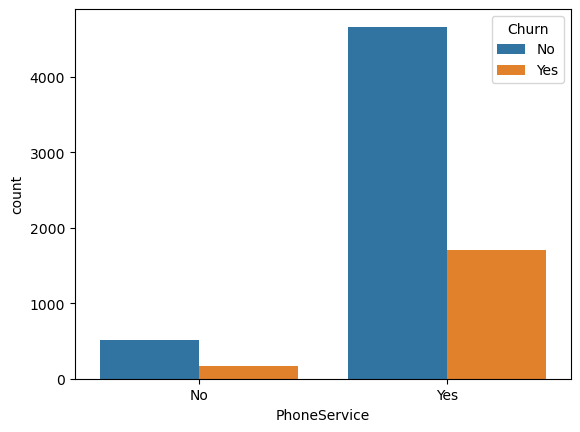

In [109]:
 sns.countplot (x='PhoneService', data= df, hue= 'Churn');

Customers who has no phone service and hasn't churn is bit higher than those who has cancelled service

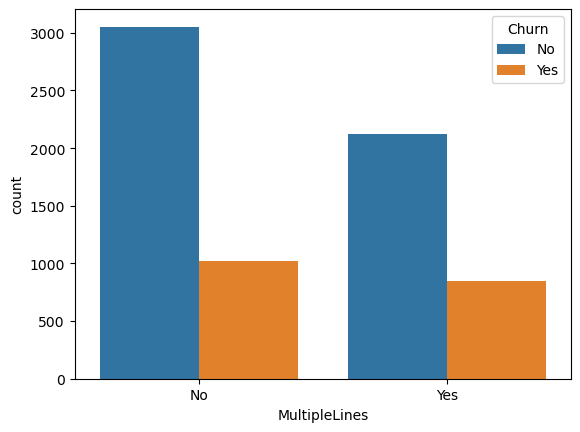

In [110]:
 sns.countplot (x='MultipleLines', data= df, hue= 'Churn');

Proportion of customers without multiple lines has churn compare to those with Multiple lines

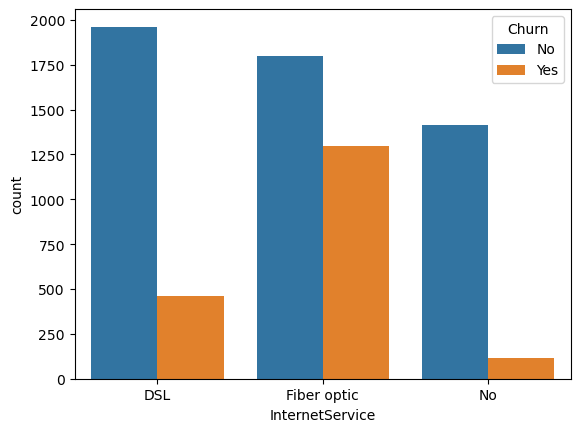

In [111]:
 sns.countplot (x='InternetService', data= df, hue= 'Churn');

<Axes: xlabel='Partner', ylabel='TotalCharges'>

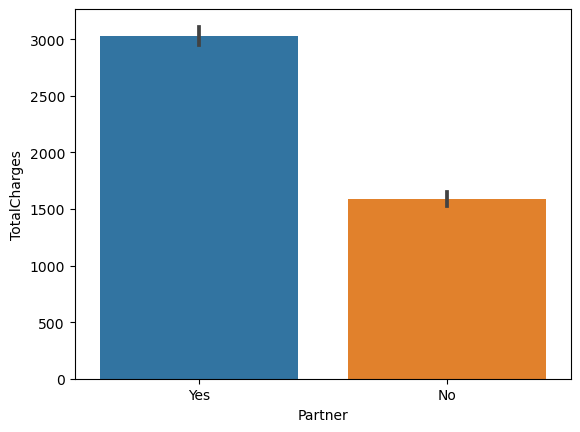

In [112]:
 sns.barplot (x='Partner', data= df, y= 'TotalCharges')

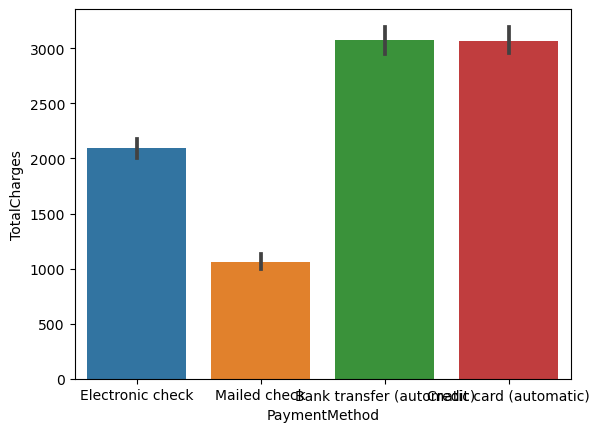

In [113]:
 sns.barplot (x='PaymentMethod', data= df, y= 'TotalCharges');

<Axes: xlabel='Contract', ylabel='TotalCharges'>

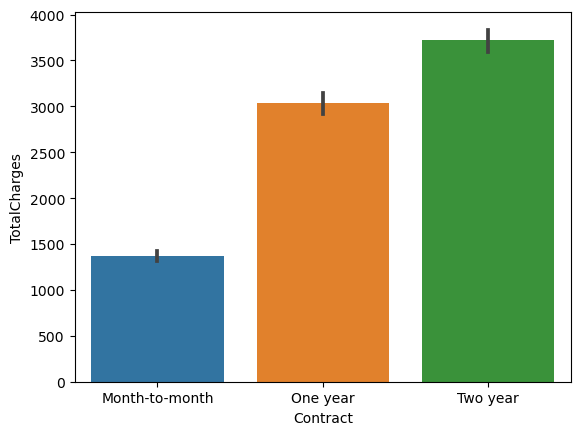

In [114]:
sns.barplot (x='Contract', data= df, y= 'TotalCharges')

<Axes: xlabel='MultipleLines', ylabel='TotalCharges'>

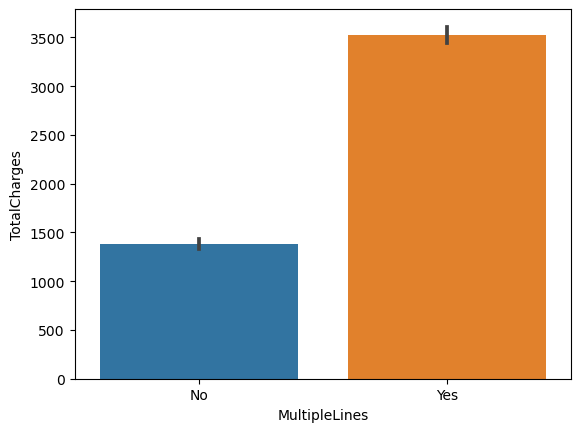

In [115]:
sns.barplot (x='MultipleLines', data= df, y= 'TotalCharges')

The company has generated more revenue from customer with multiple lines compare to those without multiple lines

In [116]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_duration'],
      dtype='object')

### Multivariate Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_15168\703304077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

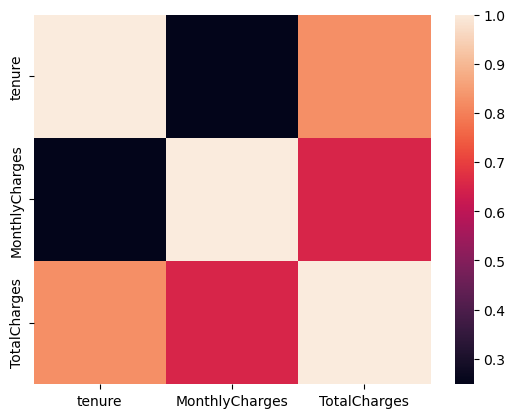

In [117]:
#correlation
sns.heatmap(df.corr())

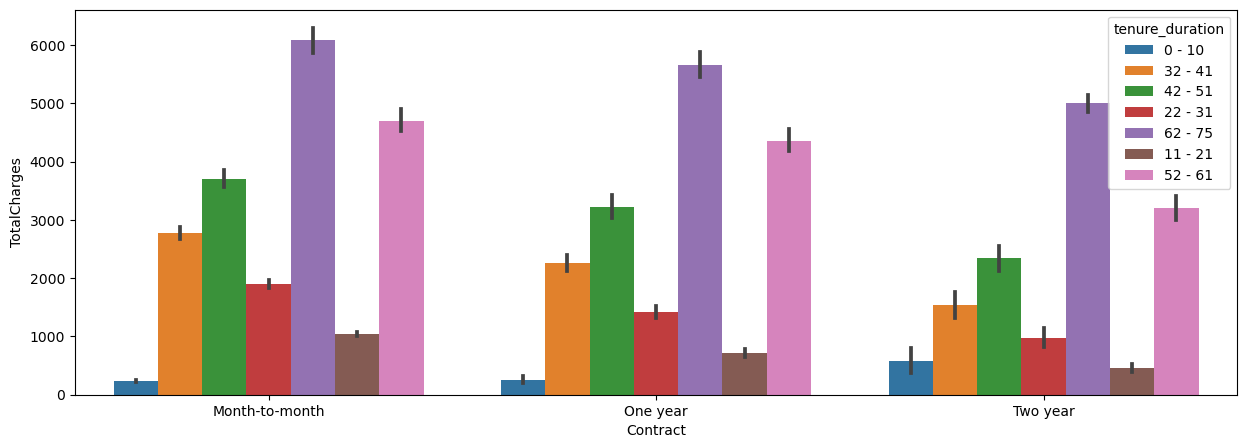

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x="Contract", y='TotalCharges', data=df, hue="tenure_duration");

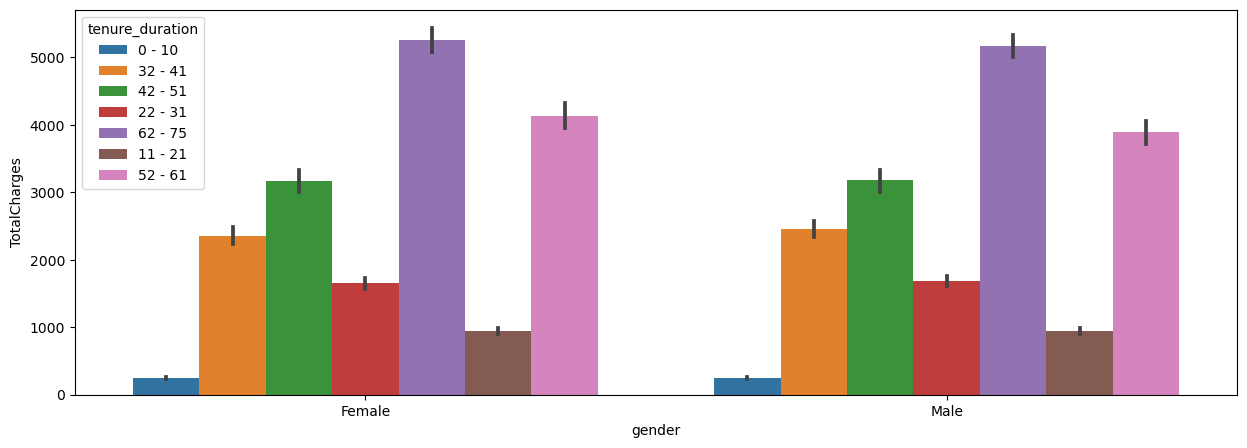

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x="gender", y='TotalCharges', data=df, hue="tenure_duration");

both male and female gender that generated highest revenue fall between the tenure duration (62-75)

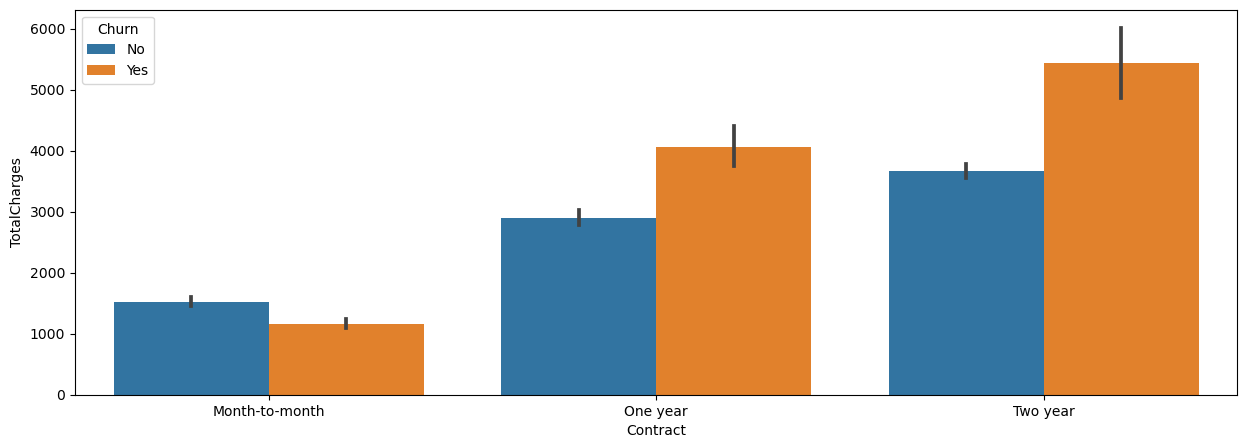

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(x="Contract", y='TotalCharges', data=df, hue="Churn");

- Customers who signed two year contract with the company generated more revenue, unfortunately more than then third quarter of them has churn
- also for those that sign a year contract, the proportion of those thas churn and generate more revenue is higher to those who hasn't cancelled
- month-to-month contract customers who hasn't churn is higher compare to those who has churn

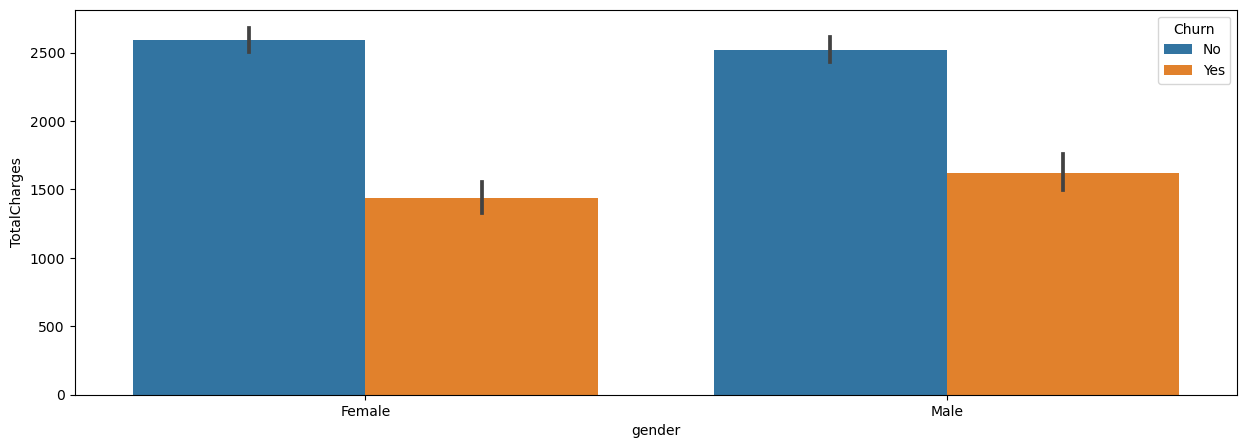

In [121]:
plt.figure(figsize=(15,5))
sns.barplot(x="gender", y='TotalCharges', data=df, hue="Churn");

Female who hasn't cancell service with the company generated more revenue than their male counterpart while for those who have churn the male gender generated more revenue compare to the female

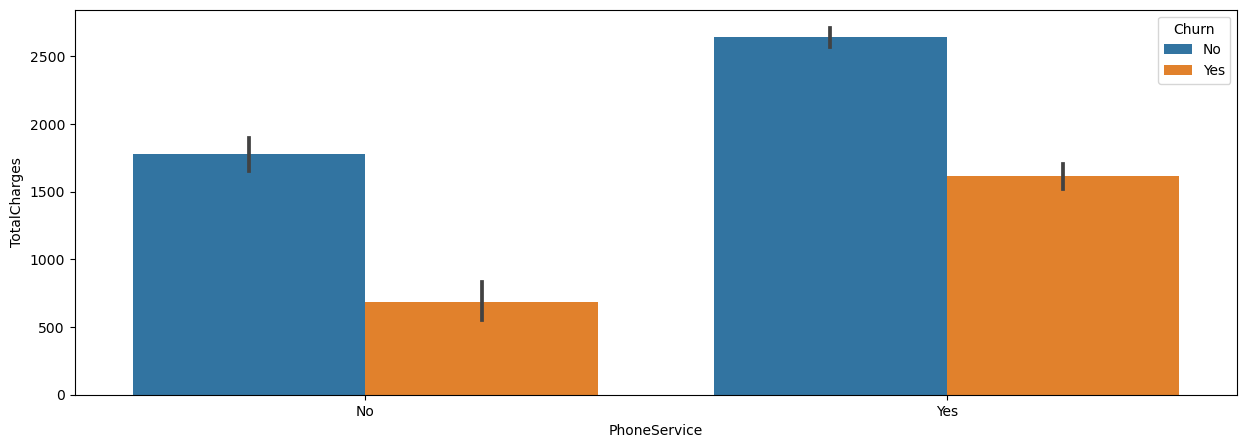

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(x="PhoneService", y='TotalCharges', data=df, hue="Churn");

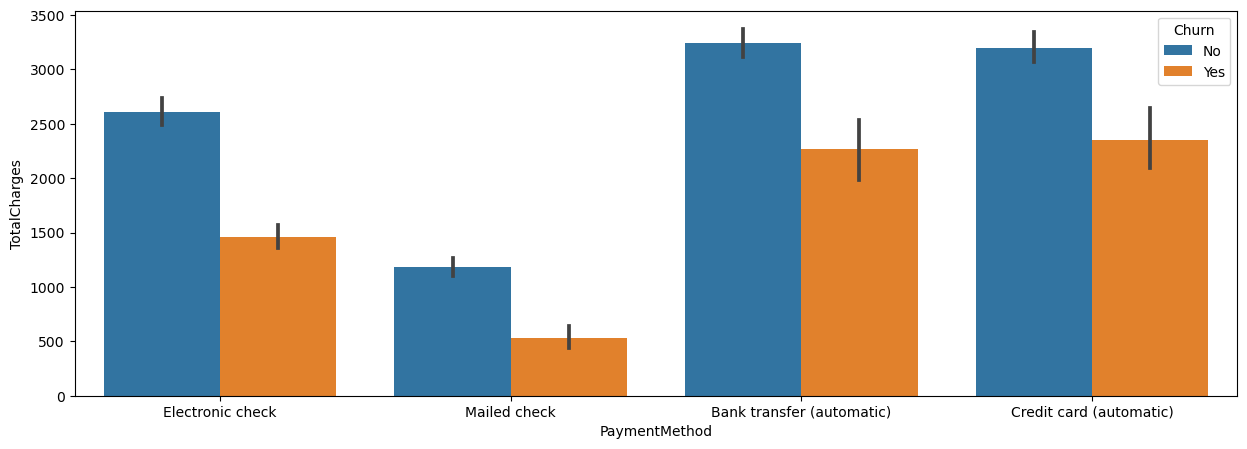

In [123]:
plt.figure(figsize=(15,5))
sns.barplot(x="PaymentMethod", y='TotalCharges', data=df, hue="Churn");

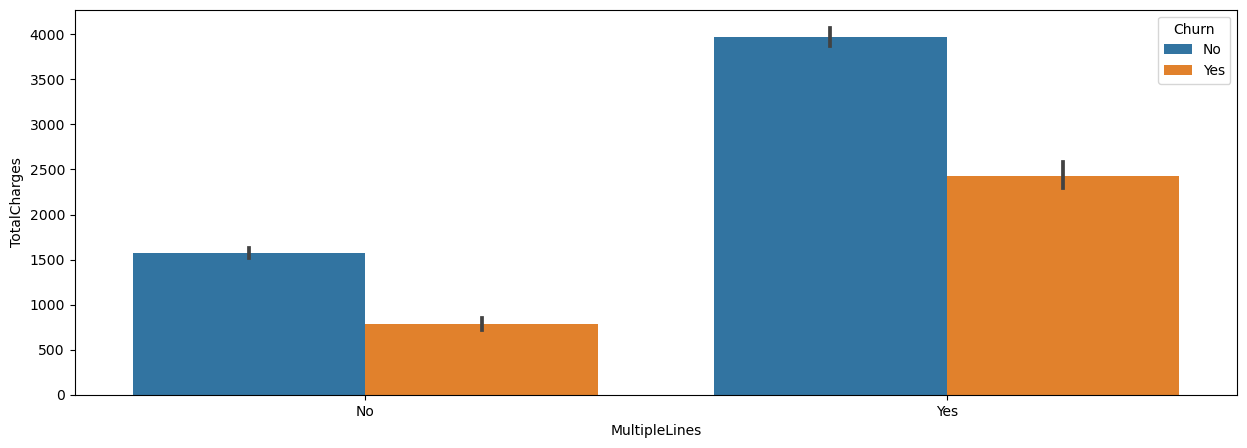

In [124]:
plt.figure(figsize=(15,5))
sns.barplot(x="MultipleLines", y='TotalCharges', data=df, hue="Churn");

Customers have multiple lines generating more revenue has churn more when compare with those without multiple lines

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


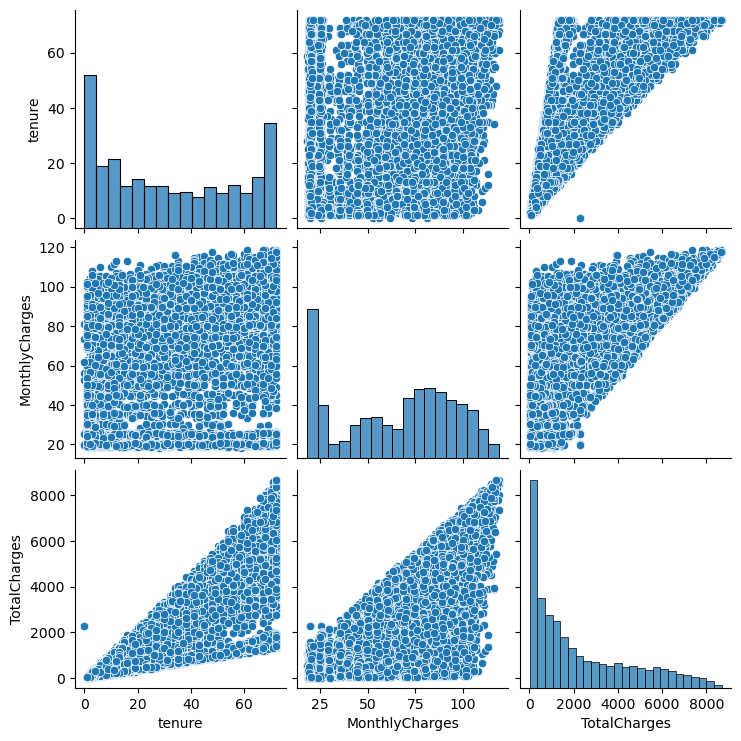

In [125]:
sns.pairplot(df, size=2.5);

### Feature Engineering/ Data pre-processing

In [126]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [127]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 - 10
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,32 - 41
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 - 10
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,42 - 51
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0 - 10


In [128]:
def ch(x):
    if x == "Yes":
        return 0
    else:
        return 1
df["Churn"] = df['Churn'].apply(ch)

In [129]:
#  Label Encoding
encoder = LabelEncoder()    # method initialization

# Looping for columns
for c in df.columns[0:]:
    if (df[c].dtype=='object'):
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,5375,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,2,29.85,29.85,1,0
1,3962,1,0,0,0,34,1,0,0,1,...,0,0,0,1,0,3,56.95,1889.50,1,3
2,2564,1,0,0,0,2,1,0,0,1,...,0,0,0,0,1,3,53.85,108.15,0,0
3,5535,1,0,0,0,45,0,0,0,1,...,1,0,0,1,0,0,42.30,1840.75,1,4
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,0,0


In [130]:
# create a copy of the data (Exclude churn/label)

df1= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
        
label = df[['Churn']]

In [131]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [132]:
label.head()

,Churn
0,1
1,1
2,0
3,1
4,0


In [133]:
df['PaymentMethod'].unique()

array([2, 3, 0, 1])

df1 = pd.get_dummies(data=df1, columns=['d_f'],drop_first=True)
df1.head(2)

In [134]:

df1 = pd.get_dummies(data=df1,columns=['InternetService'])
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService_0,InternetService_1,InternetService_2
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,2,29.85,29.85,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,1,0,3,56.95,1889.50,1,0,0


In [135]:

df1 = pd.get_dummies(data=df1,columns=['Contract'])
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2
0,0,0,1,0,1,0,0,0,1,0,...,1,2,29.85,29.85,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,3,56.95,1889.50,1,0,0,0,1,0


In [136]:
df1 = pd.get_dummies(data=df1,columns=['PaymentMethod'])
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


ms = MinMaxScaler()

In [137]:
# Normalize the data
scaler = MinMaxScaler()

df1["Scaled_tenure"] = scaler.fit_transform(df1['tenure'].values.reshape(-1,1))
df1["Scaled_ monthlycharges"] = scaler.fit_transform(df1['MonthlyCharges'].values.reshape(-1,1))
df1["Scaled_ totalcharges"] = scaler.fit_transform(df1['TotalCharges'].values.reshape(-1,1))


df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Scaled_tenure,Scaled_ monthlycharges,Scaled_ totalcharges
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0.013889,0.115423,0.001275
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,0.472222,0.385075,0.215867
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,0.027778,0.354229,0.010310
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,0.625000,0.239303,0.210241
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0.027778,0.521891,0.015330


In [138]:
df1.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1, inplace=True)


In [139]:
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

####  Machine learning

In [140]:
# Split the dataset into training and testing sets - X = Questions, Y = Answers

x_train, x_test, y_train, y_test  = train_test_split(df1, label, test_size=0.2, random_state=42)

In [141]:
x_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Scaled_tenure,Scaled_ monthlycharges,Scaled_ totalcharges
2142,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0.291667,0.463682,0.152089
1623,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0.750000,0.785572,0.589736
6074,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.013889,0.051741,0.000537
1362,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.055556,0.516915,0.025288
6754,1,0,0,1,1,1,1,1,0,1,...,0,0,1,1,0,0,0,0.000000,0.434328,0.261309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0.013889,0.763682,0.008793
5191,0,0,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0.319444,0.724876,0.251500
5226,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.166667,0.028856,0.033147
5390,1,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0.166667,0.807960,0.136320


In [142]:
x_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Scaled_tenure,Scaled_ monthlycharges,Scaled_ totalcharges
185,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.013889,0.065174,0.000692
2715,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0.569444,0.069652,0.112814
3825,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0.722222,0.010945,0.116882
1807,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0.013889,0.578109,0.006641
132,1,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0.930556,0.321393,0.374025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,1,0,0,1,1,1,...,0,0,1,0,0,0,1,0.888889,0.498010,0.503116
315,1,0,1,1,1,1,1,1,0,1,...,0,1,0,0,1,0,0,0.708333,0.913433,0.654004
2439,1,0,1,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0.236111,0.016418,0.035882
5002,0,0,1,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0.958333,0.255721,0.339407


In [143]:
y_train

,Churn
2142,1
1623,1
6074,0
1362,0
6754,1
...,...
3772,0
5191,1
5226,1
5390,0


In [144]:
y_test

,Churn
185,0
2715,1
3825,1
1807,0
132,1
...,...
6366,1
315,1
2439,1
5002,1


In [145]:
# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [146]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8218594748048261
Precision: 0.8610855565777369
Recall: 0.9034749034749034
F1-score: 0.8817710786622704
AUC-ROC: 0.7493245831047439


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### For Logistics Regression
- Accuracy is 82%
- Precision is 69%
- ROC IS 75%

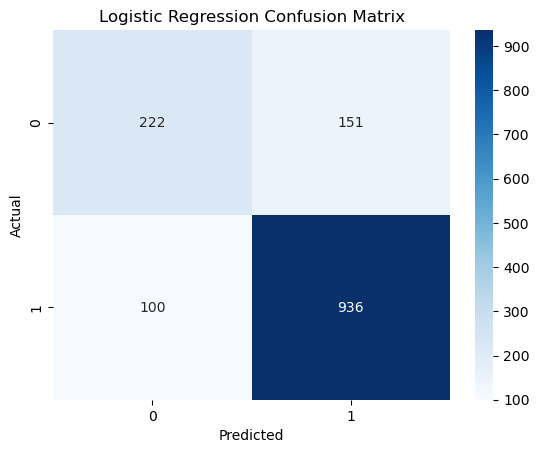

In [164]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


- True Postive (TP) is 222
- False Positive (FP) is 151
- False Negative (FN) is 100
- True Negative (TN) is 936


Out the total numbers of 1409 persons presented this model test to predict their churn status, 222 persons were postively predicted to have cancelled their service with the company it resulted to be true, 151 persons were negatively predicted churn, 100 persons were negatively predicted to not have cancelled service but it resulted to be false and 936 persons predicted not to have churn it resulted to be true

In summary, the model tends to predict 1158 correctly out of 1409

In [148]:
# Model Building
# Random Forest Classifier

rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC", roc_auc_score(y_test, rfy_pred))

C:\Users\USER\AppData\Local\Temp\ipykernel_15168\1508615150.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Random Forest
Accuracy: 0.7934705464868701
Precision: 0.8293545534924845
Recall: 0.9054054054054054
F1-score: 0.8657129672358098
AUC-ROC 0.69398956597348


#####  For Random Forest Classifier
- Accuracy is 79%
- Precision is 83%
- ROC is 70%

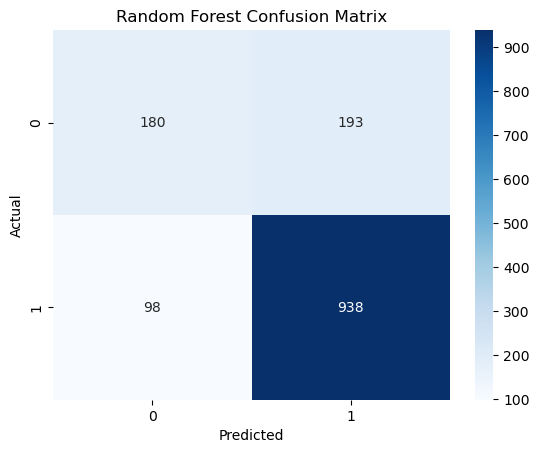

In [149]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

- True Postive (TP) is 182
- False Positive (FP) is 191
- False Negative (FN) is 101
- True Negative (TN) is 935

Out the total numbers of 1409 persons presented this model test to predict their churn status, 182 persons were postively predicted to have cancelled their service with the company it resulted to be true, 191 persons were negatively predicted churn, 101 persons were negatively predicted to not have cancelled service but it resulted to be false and 935 persons predicted not to have churn it resulted to be true


In summary, the model tends to predict 1115 correctly out of 1409

In [150]:
# 8 Machine Learning Algorithm will be applied to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
              [RandomForestClassifier(),'Random Forest'],
              [KNeighborsClassifier(),'K-Nearest Neighbors'],
              [SGDClassifier(),'SGD Classifier'],
              [SVC(),'SVC'],
              [GaussianNB(), "Naive Bayes"],
              [DecisionTreeClassifier(random_state = 42), "Decision tree"],
              [LogisticRegression(),'Logistic Regression'],
              ]

In [151]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassif

In [152]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])

    
    
    if model_name != classifiers[-1][1]:
        print('')

C:\Users\USER\AppData\Local\Temp\ipykernel_15168\2798011560.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
acc_list

{'XGB Classifier': ['80.13%'],
 'Random Forest': ['79.7%'],
 'K-Nearest Neighbors': ['76.58%'],
 'SGD Classifier': ['79.49%'],
 'SVC': ['81.55%'],
 'Naive Bayes': ['75.51%'],
 'Decision tree': ['72.89%'],
 'Logistic Regression': ['82.19%']}

In [154]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,80.13%,79.7%,76.58%,79.49%,81.55%,75.51%,72.89%,82.19%


In [155]:
print("Precision Score")
sl = pd.DataFrame(precision_list)
sl.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.63%,83.6%,83.24%,87.39%,84.64%,91.98%,81.87%,86.11%


In [156]:
print("Recall Score")
sl = pd.DataFrame(recall_list)
sl.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,90.73%,90.06%,85.33%,84.27%,91.51%,73.07%,81.08%,90.35%


In [157]:
print("ROC Score")
sl = pd.DataFrame(roc_list)
sl.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,70.7%,70.5%,68.8%,75.24%,72.7%,77.69%,65.61%,74.93%


#### Narration

- ACCURACY: Logistic Regression and SVC has the highest percentage of Accurracy score of 82.19 and 81.55 respectively followed by XGB Classifier 79.77

- PRECISION: Naive Bayes and SDG Classifier has the highest percentage of Precision score of 91.98 and 90.1 respectively followed by Logistic Regression (86.11)

- RE-CALL: SVC  and Logistic Regression  has the highest percentage of Re- call score of 91.51 and 90.35 respectively followed by XGB (90.73)

- ROC: Naive Bayes and SDG Classifier has the highest percentage of ROC score of 77.69 and 74.46 respectively followed by Logistic Regression (74.93)


In all the models  Logistic Regression, Naive Bayes, XGB, SVC and SBG tends to be doing better

In [158]:
# XGB Classifier

xcf = XGBClassifier()
xcf.fit(x_train, y_train)
xcfy_pred = xcf.predict(x_test)
print("XGB classifier")
print("Accuracy:", accuracy_score(y_test, xcfy_pred))
print("Precision:", precision_score(y_test, xcfy_pred))
print("Recall:", recall_score(y_test, xcfy_pred))
print("F1-score:", f1_score(y_test, xcfy_pred))
print("AUC-ROC", roc_auc_score(y_test, xcfy_pred)) 

XGB classifier
Accuracy: 0.801277501774308
Precision: 0.8362989323843416
Recall: 0.9073359073359073
F1-score: 0.8703703703703702
AUC-ROC 0.70701916010227


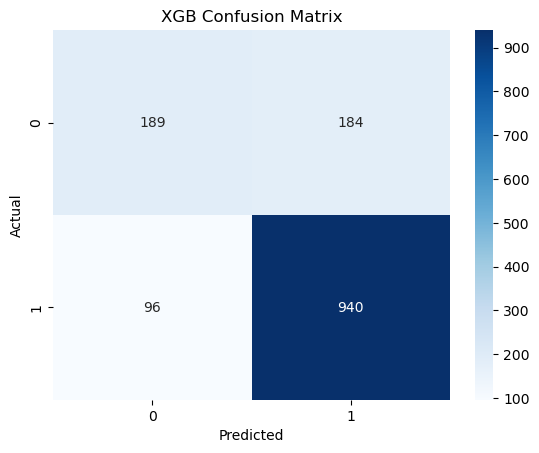

In [159]:
# Create a confusion matrix
xcm = confusion_matrix(y_test, xcfy_pred)

# Visualize the confusion matrix
sns.heatmap(xcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGB Confusion Matrix")
plt.show()

- True Postive (TP) is 189
- False Positive (FP) is 184
- False Negative (FN) is 96
- True Negative (TN) is 940

Out the total numbers of 1409 persons presented this model test to predict their churn status, 189 persons were postively predicted to have cancelled their service with the company it resulted to be true, 184 persons were negatively predicted churn, 96 persons were negatively predicted to not have cancelled service but it resulted to be false and 940 persons predicted not to have churn it resulted to be true

In summary, the model tends to predict 1129 correctly out of 1409

In [166]:
# SDG Classifier

scf = SGDClassifier()
scf.fit(x_train, y_train)
scfy_pred = scf.predict(x_test)
print("SDG classifier")
print("Accuracy:", accuracy_score(y_test, scfy_pred))
print("Precision:", precision_score(y_test, scfy_pred))
print("Recall:", recall_score(y_test, scfy_pred))
print("F1-score:", f1_score(y_test, scfy_pred))
print("AUC-ROC", roc_auc_score(y_test, scfy_pred)) 

SDG classifier
Accuracy: 0.8119233498935415
Precision: 0.8533455545371219
Recall: 0.8986486486486487
F1-score: 0.8754113775270334
AUC-ROC 0.7348471125280777


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


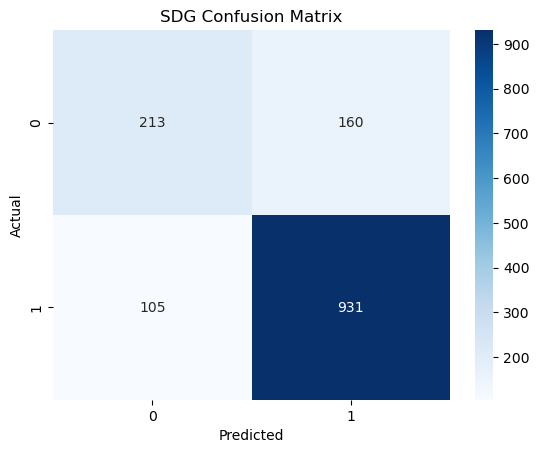

In [167]:
# Create a confusion matrix
scm = confusion_matrix(y_test, scfy_pred)

# Visualize the confusion matrix
sns.heatmap(scm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SDG Confusion Matrix")
plt.show()

- True Postive (TP) is 213
- False Positive (FP) is 160
- False Negative (FN) is 105
- True Negative (TN) is 931

Out the total numbers of 1409 persons presented this model test to predict their churn status, 213 persons were postively predicted to have cancelled their service with the company it resulted to be true, 160 persons were negatively predicted churn, 105 persons were negatively predicted to not have cancelled service but it resulted to be false and 931 persons predicted not to have churn it resulted to be true

In summary, the model tends to predict 1144 correctly out of 1409

In [160]:
# KNeighboors Classifier

kcf = KNeighborsClassifier()
kcf.fit(x_train, y_train)
kcfy_pred = kcf.predict(x_test)
print("XGB classifier")
print("Accuracy:", accuracy_score(y_test, kcfy_pred))
print("Precision:", precision_score(y_test, kcfy_pred))
print("Recall:", recall_score(y_test, kcfy_pred))
print("F1-score:", f1_score(y_test, kcfy_pred))
print("AUC-ROC", roc_auc_score(y_test, kcfy_pred))     

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


XGB classifier
Accuracy: 0.765791341376863
Precision: 0.832391713747646
Recall: 0.8532818532818532
F1-score: 0.8427073403241181
AUC-ROC 0.6880350285176022


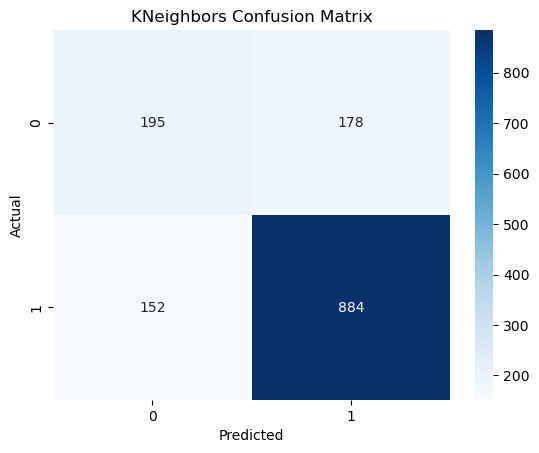

In [161]:
# Create a confusion matrix
kcm = confusion_matrix(y_test, kcfy_pred)

# Visualize the confusion matrix
sns.heatmap(kcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNeighbors Confusion Matrix")
plt.show()

- True Postive (TP) is 195
- False Positive (FP) is 178
- False Negative (FN) is 152
- True Negative (TN) is 884

Out the total numbers of 1409 persons presented this model test to predict their churn status, 195 persons were postively predicted to have cancelled their service with the company it resulted to be true, 178 persons were negatively predicted churn, 152 persons were negatively predicted to not have cancelled service but it resulted to be false and 884 persons predicted not to have churn it resulted to be true


In summary, the model tends to predict 1079 correctly out of 1409

In [162]:
# GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nby_pred = nb.predict(x_test)
print("Naive Baye")
print("Accuracy:", accuracy_score(y_test, nby_pred))
print("Precision:", precision_score(y_test, nby_pred))
print("Recall:", recall_score(y_test, nby_pred))
print("F1-score:", f1_score(y_test, nby_pred))
print("AUC-ROC", roc_auc_score(y_test, nby_pred))

Naive Baye
Accuracy: 0.7551454932576295
Precision: 0.9198055893074119
Recall: 0.7306949806949807
F1-score: 0.8144163528778914
AUC-ROC 0.7768756404815387


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


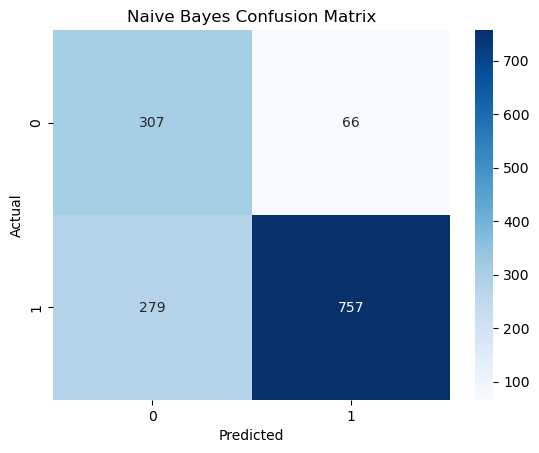

In [163]:
# Create a confusion matrix
ncm = confusion_matrix(y_test, nby_pred)

# Visualize the confusion matrix
sns.heatmap(ncm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

- True Postive (TP) is 307
- False Positive (FP) is 66
- False Negative (FN) is 279
- True Negative (TN) is 757

Out the total numbers of 1409 persons presented this model test to predict their churn status, 307 persons were postively predicted to have cancelled their service with the company it resulted to be true, 66 persons were negatively predicted churn, 279 persons were negatively predicted to not have cancelled service but it resulted to be false and 757 persons predicted not to have churn it resulted to be true

In summary, the model tends to predict 1064 correctly out of 1409
